# Events impact on scores

# Setup

In [ ]:
import os
import platform
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta
if platform.system() not in (('Darwin'), ('Linux')):
    from pickle5 import pickle

In [ ]:
# Import data
DATA_PATH = "data"
PKL_PATH = 'data/pkl'

if platform.system() in (('Darwin'), ('Linux')):
    # For Mac users :
    df = pd.read_pickle(os.path.join(PKL_PATH, "final_subset_flaired.pkl"))
else:
    ### For windows users :
    df = pickle.load(open("data/pkl/final_subset_flaired.pkl", "rb"))

events = pd.read_csv("data/events/events.csv").iloc[:,1:4]

In [16]:
# Transform data type for further use
df['date'] = pd.DatetimeIndex(df['date'])#.normalize()
events['date'] = pd.DatetimeIndex(events['date'])#.normalize()

In [19]:
# Create subdata for each party
party_grps = df.groupby('parties')
df_rep = df[df["parties"] == "Republican"]
df_dem = df[df["parties"] == "Democrat"]

# Sentiment score distribution around key events

### 2 weeks prior and after event

<ipython-input-20-4b5d9d44aa60>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(1, 3, sharey=True, figsize=(16.5,6))


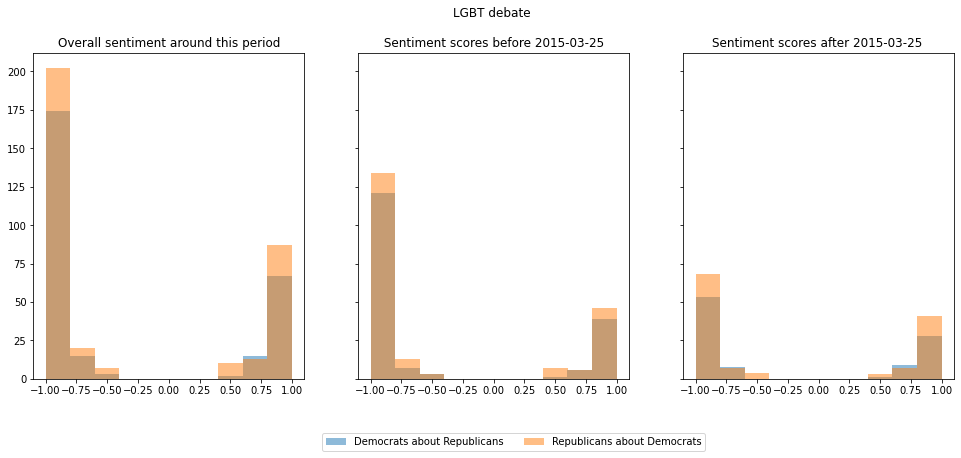

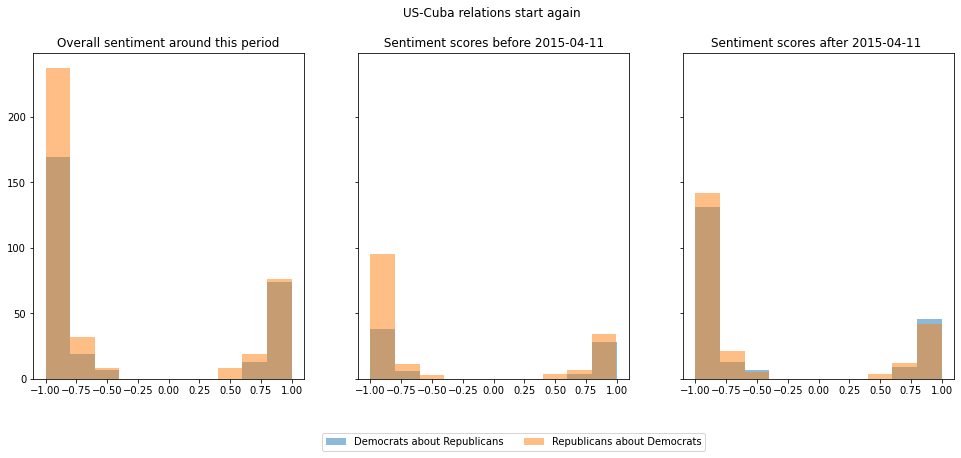

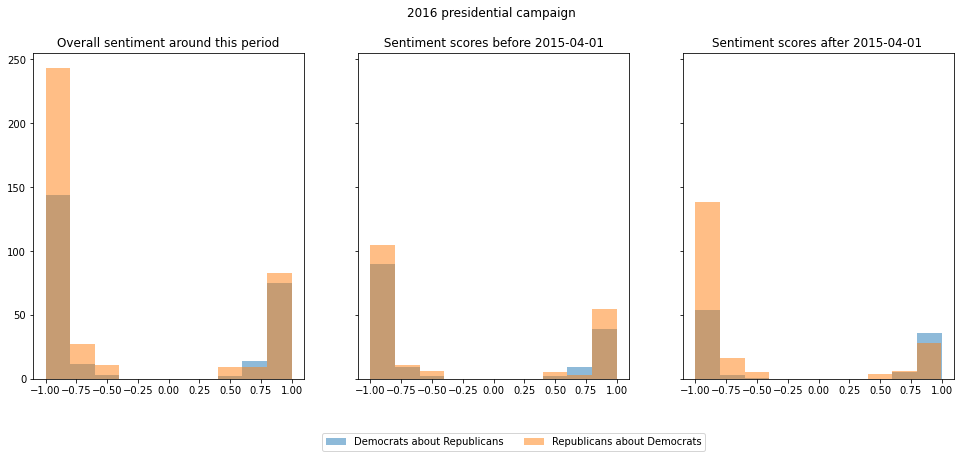

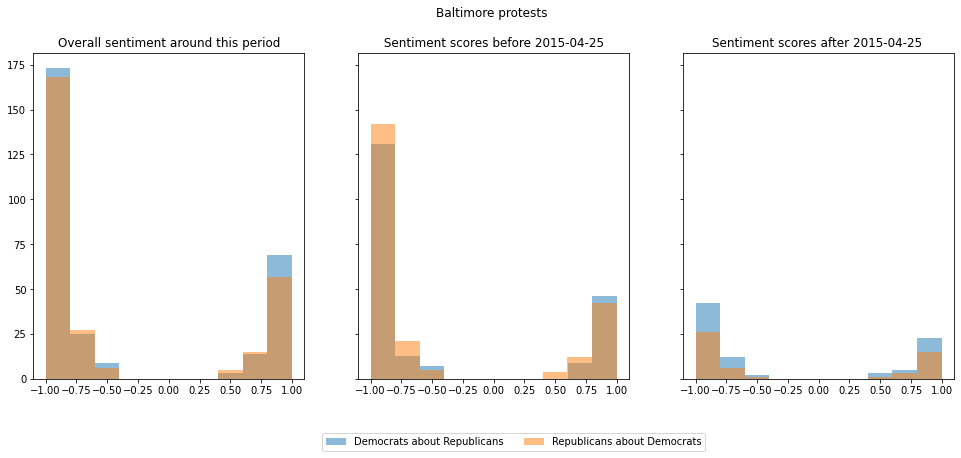

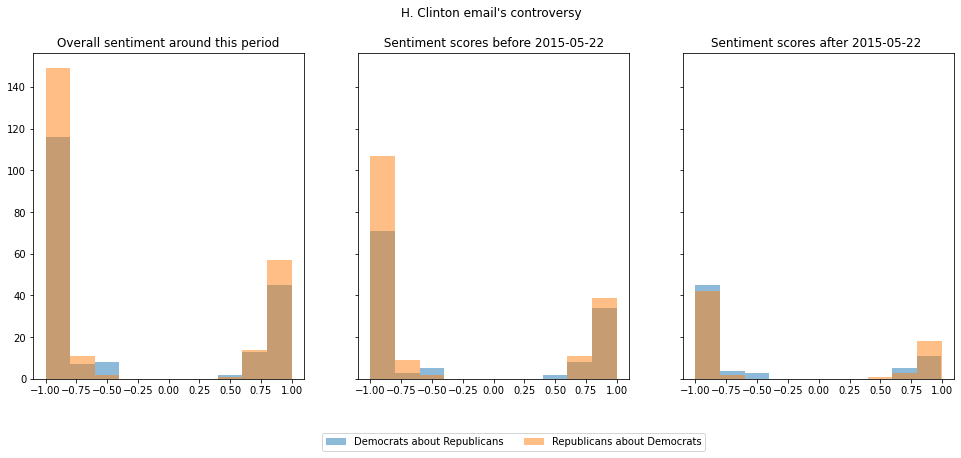

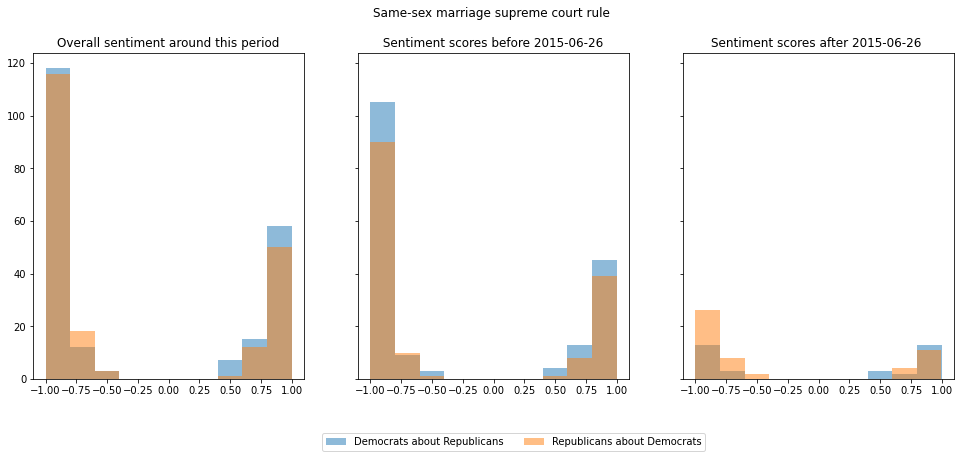

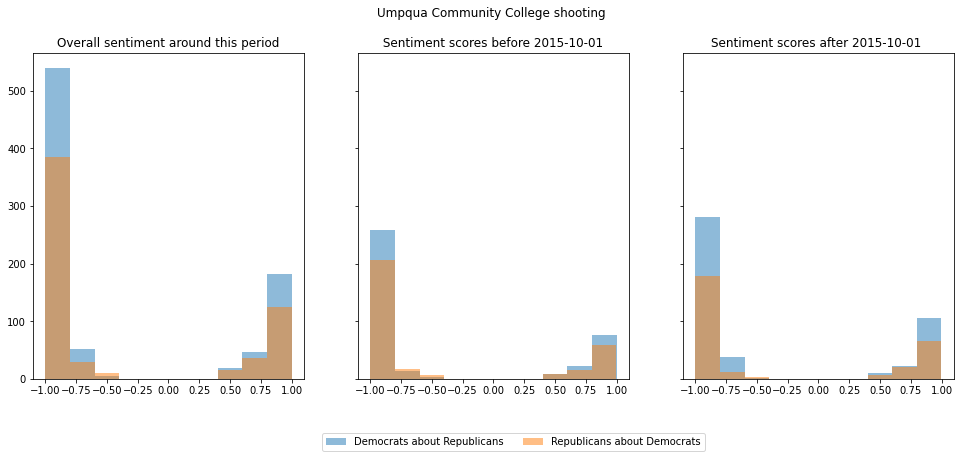

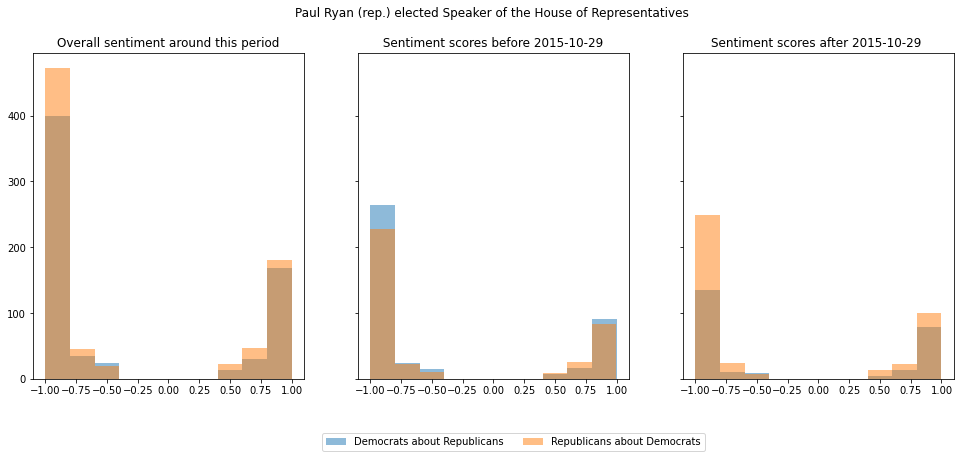

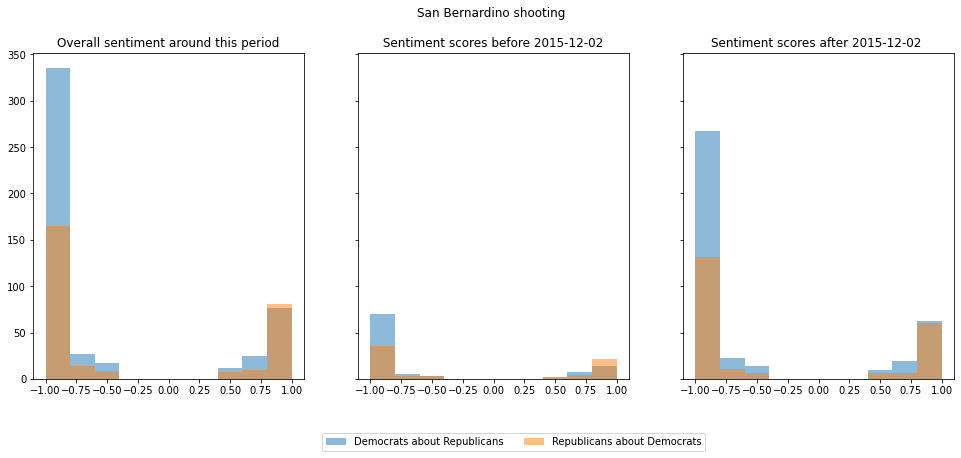

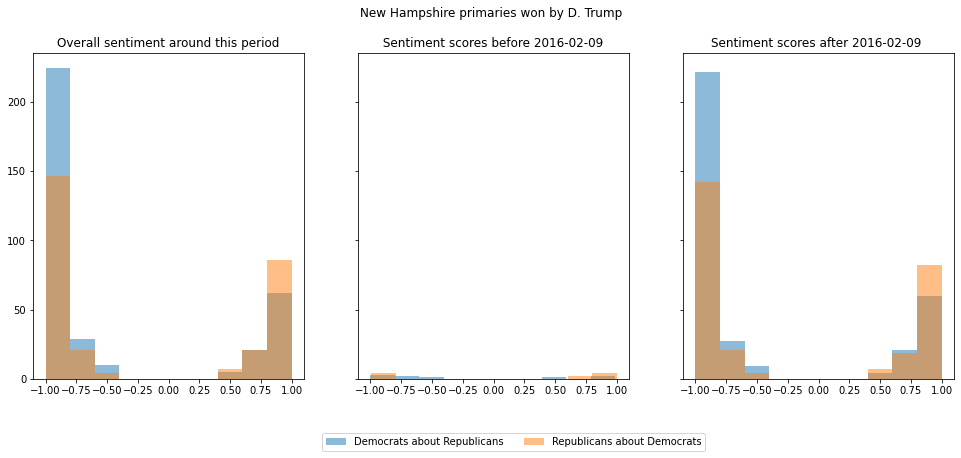

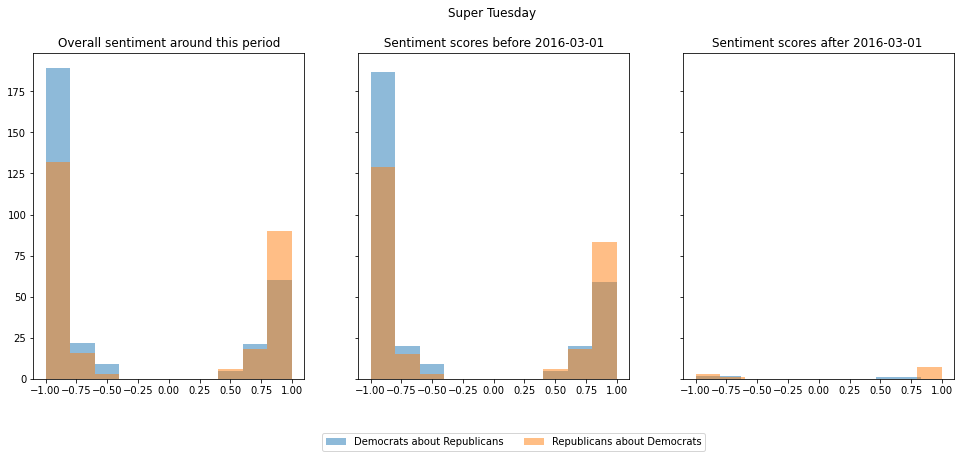

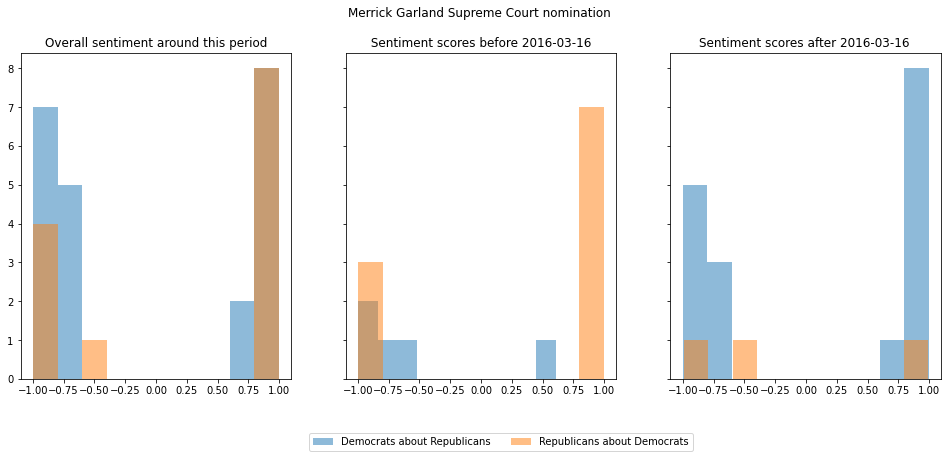

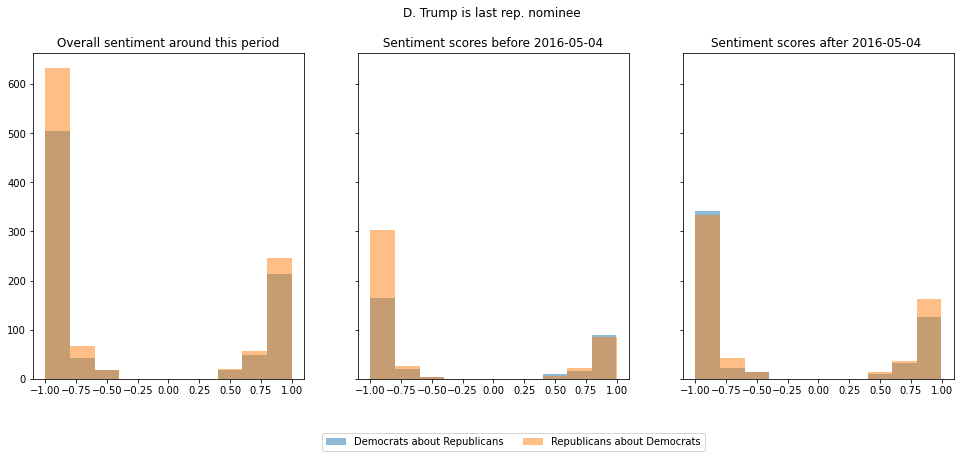

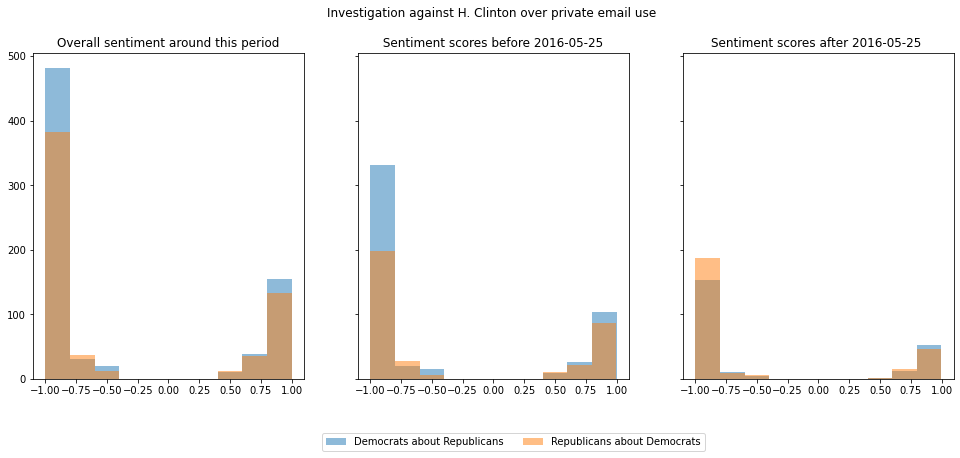

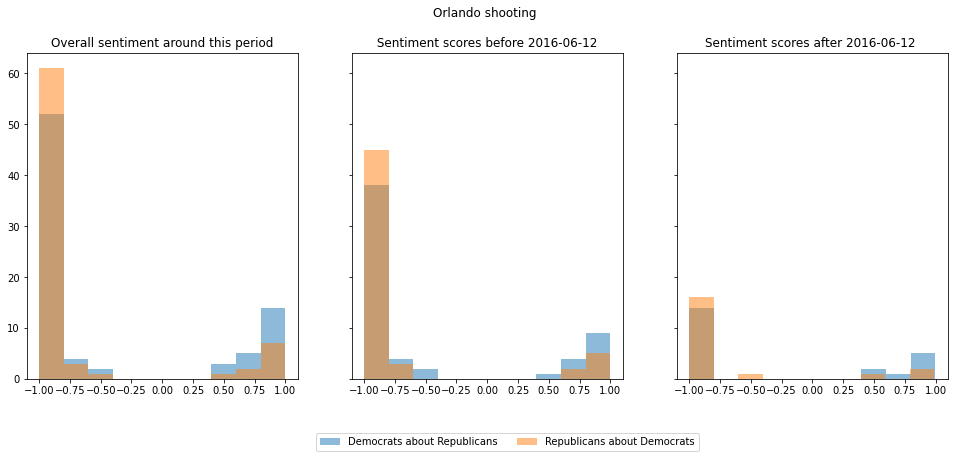

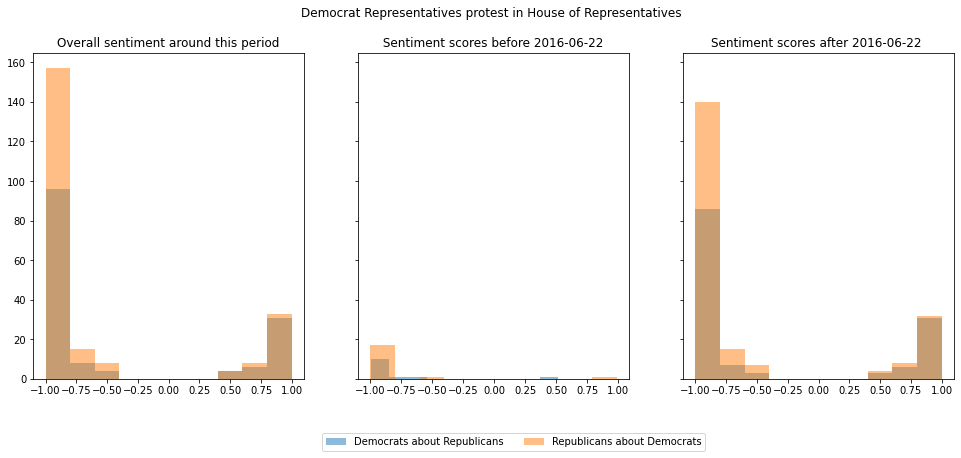

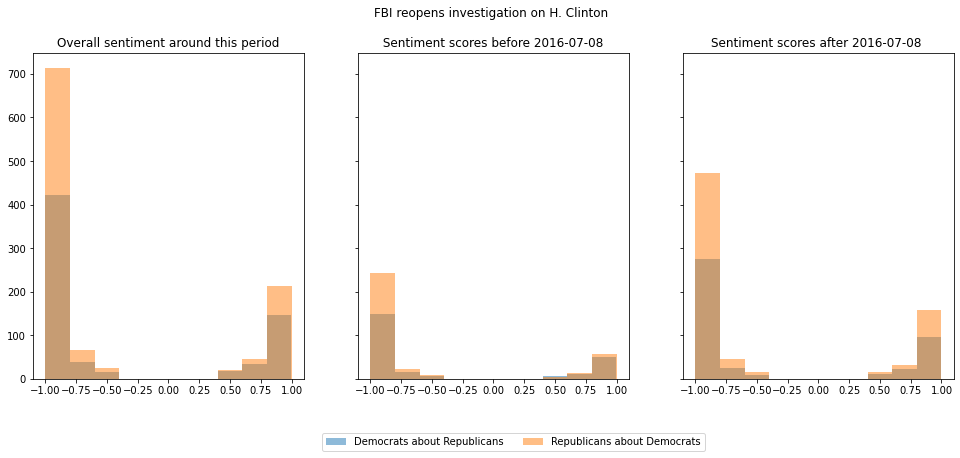

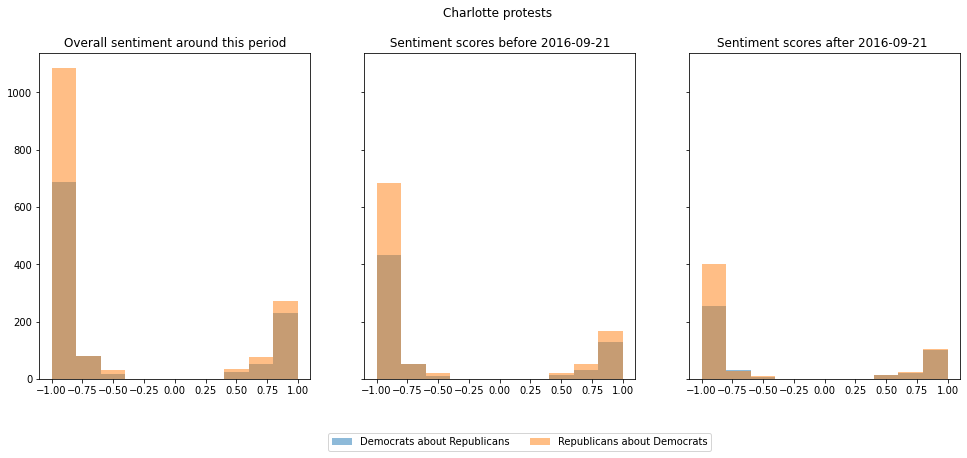

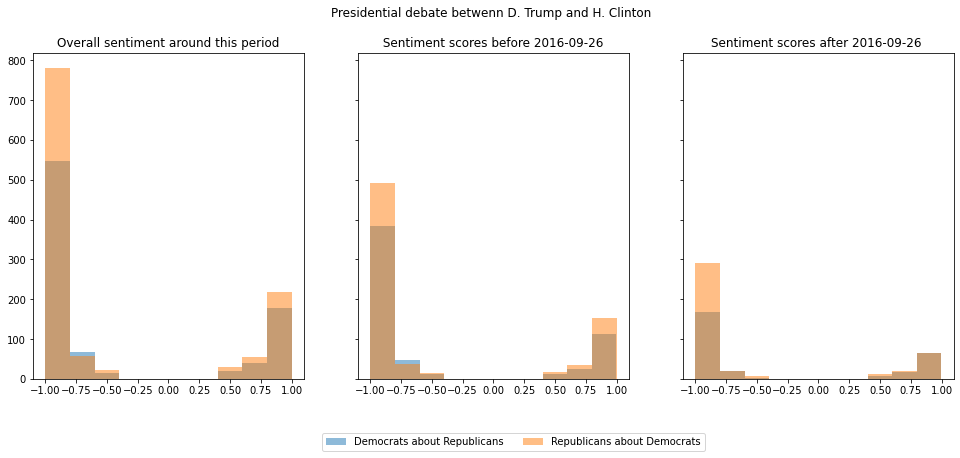

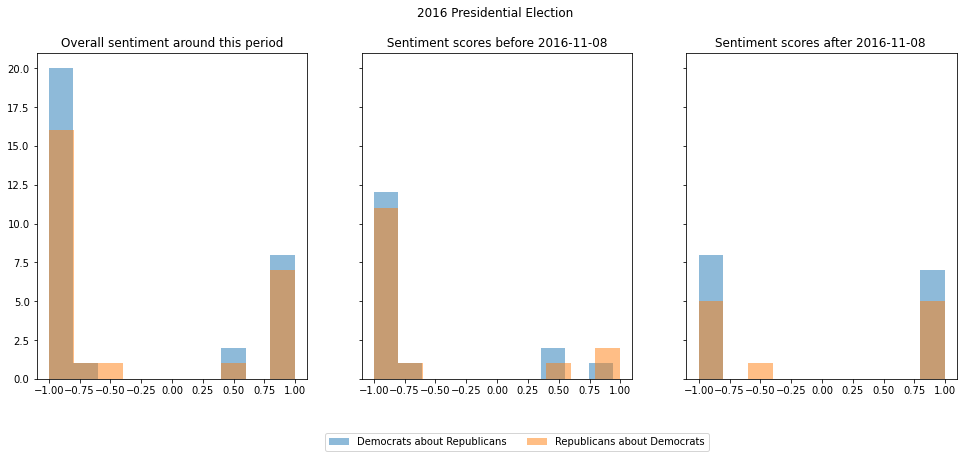

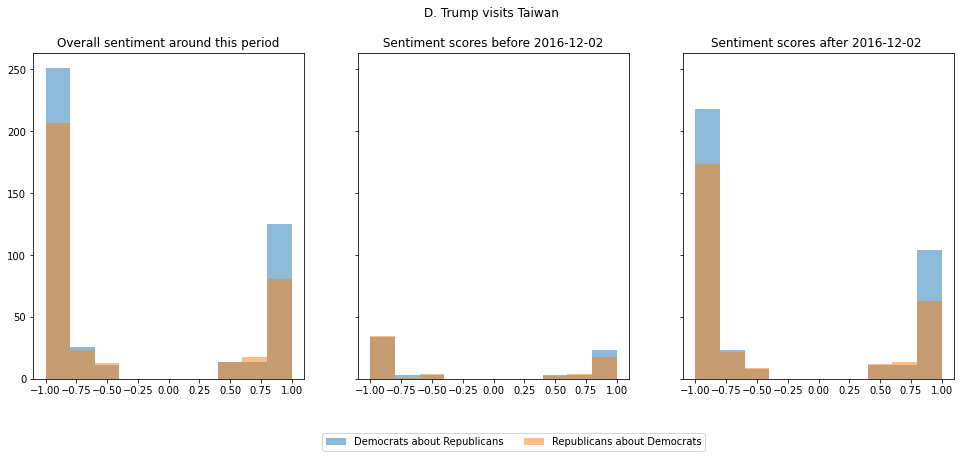

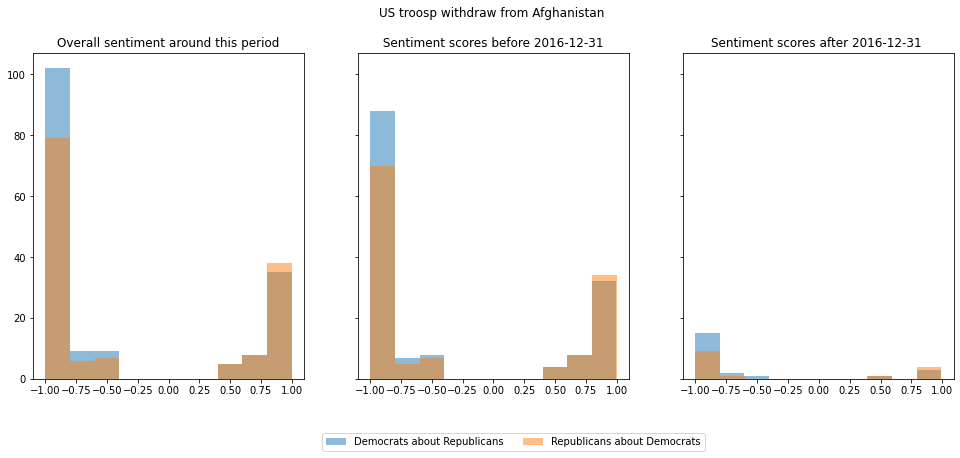

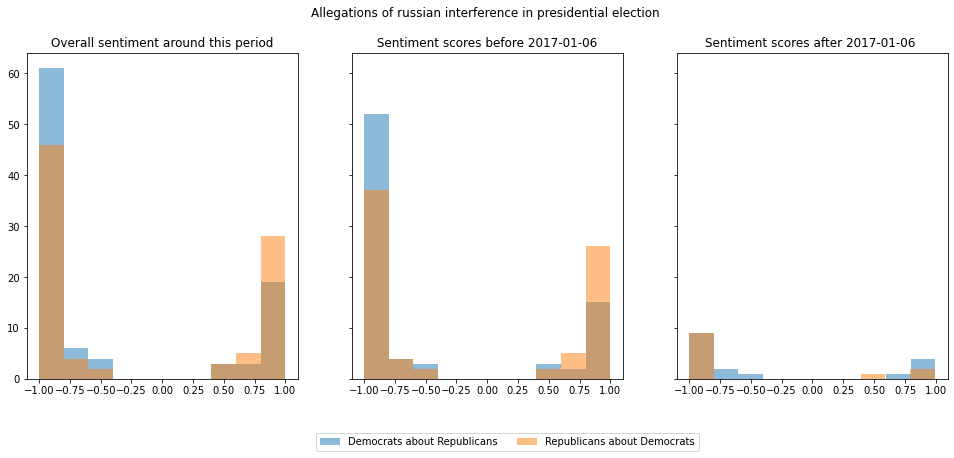

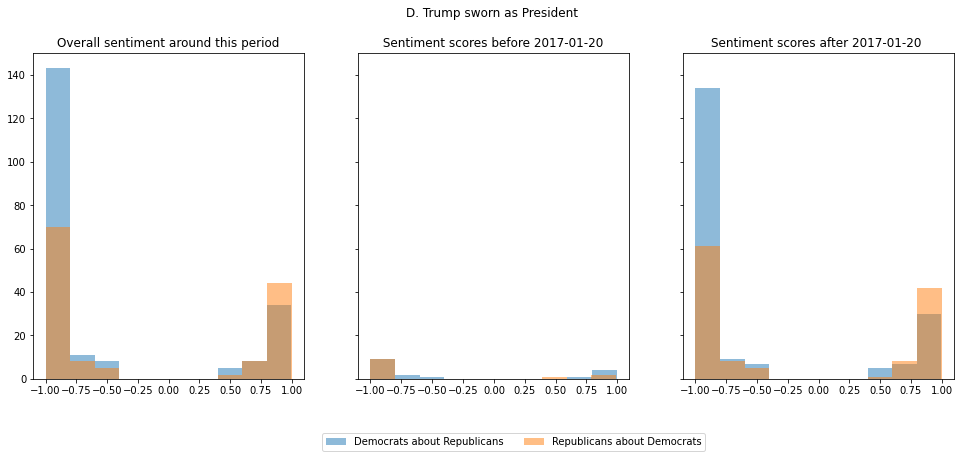

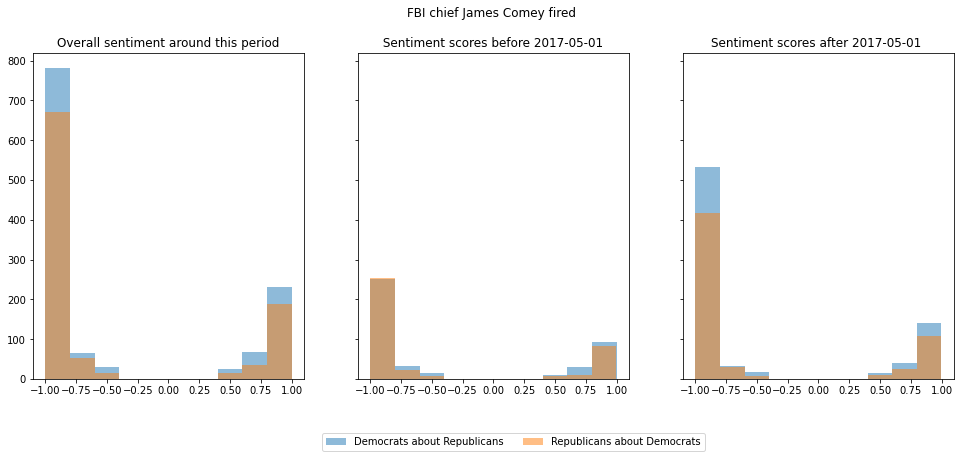

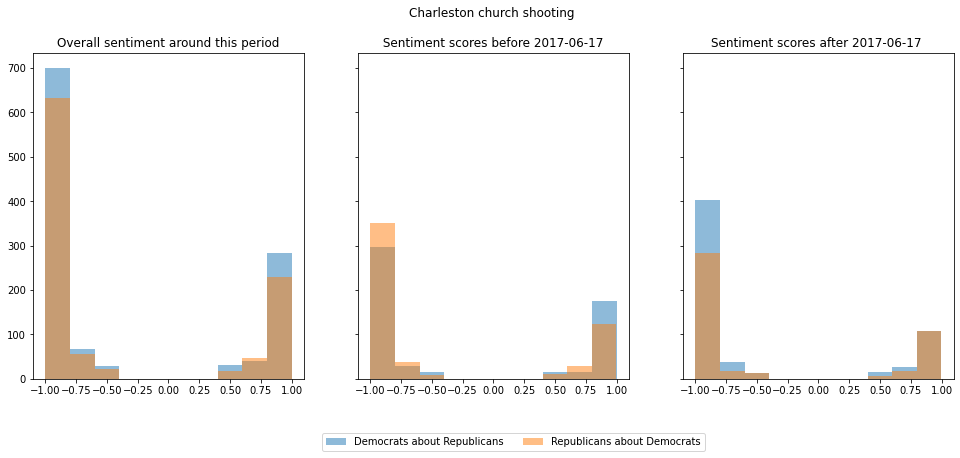

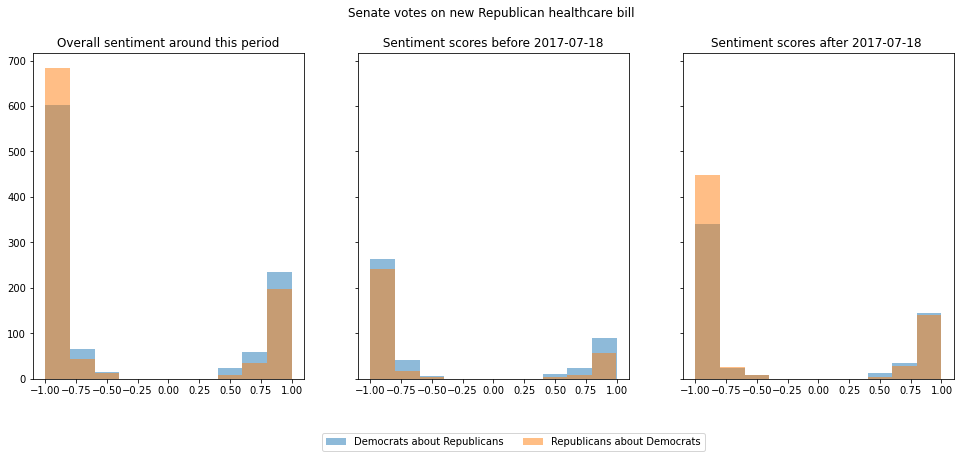

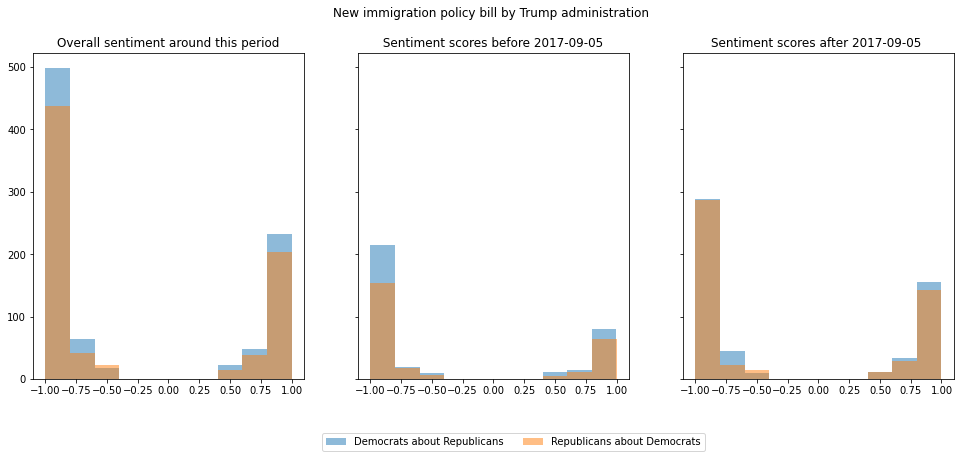

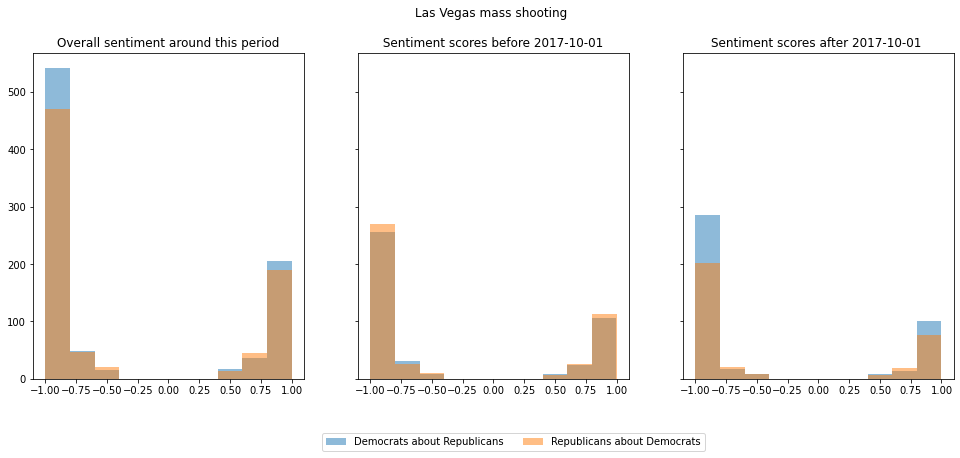

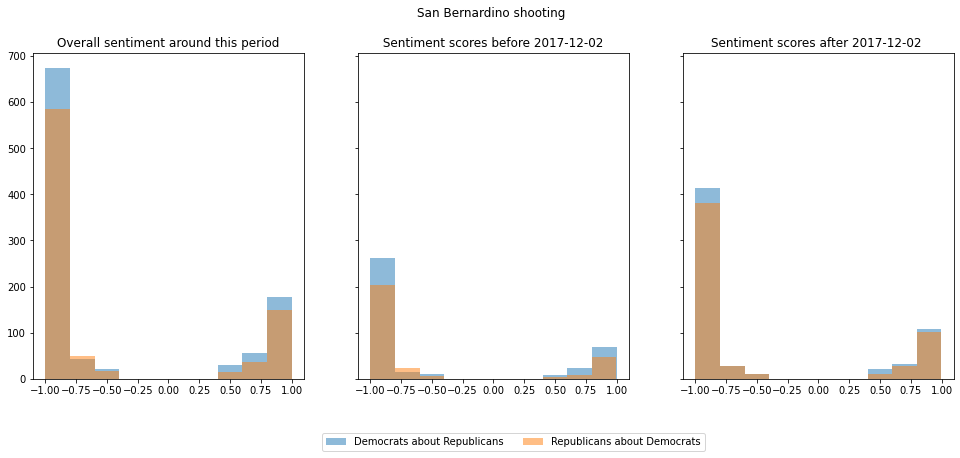

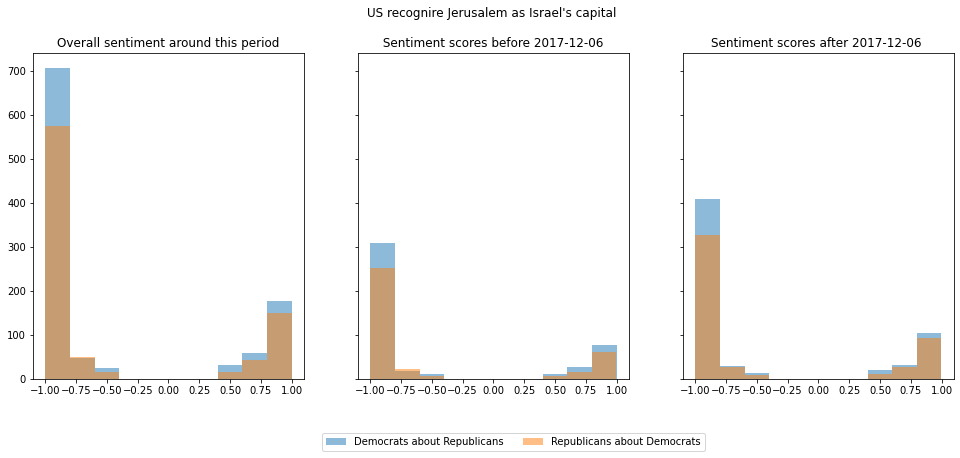

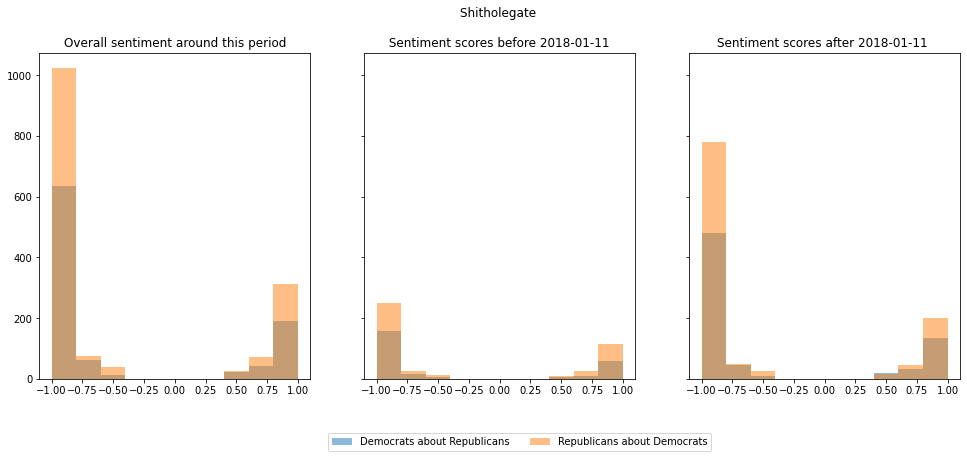

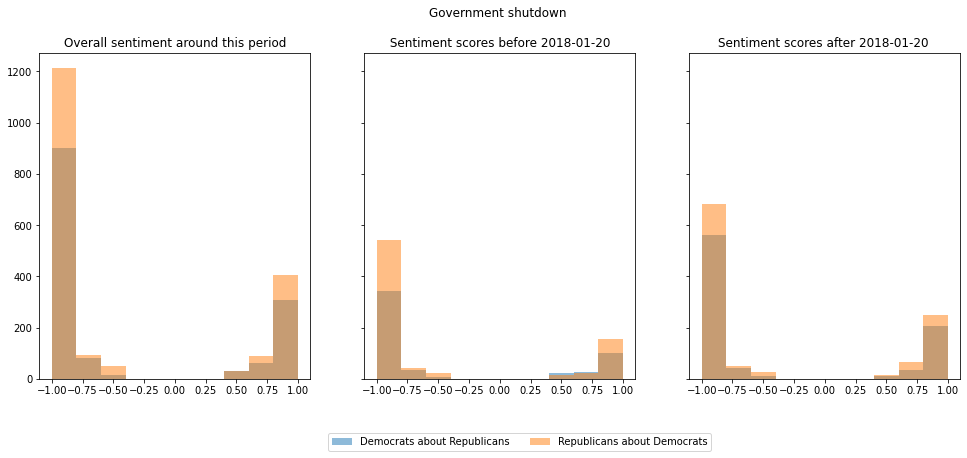

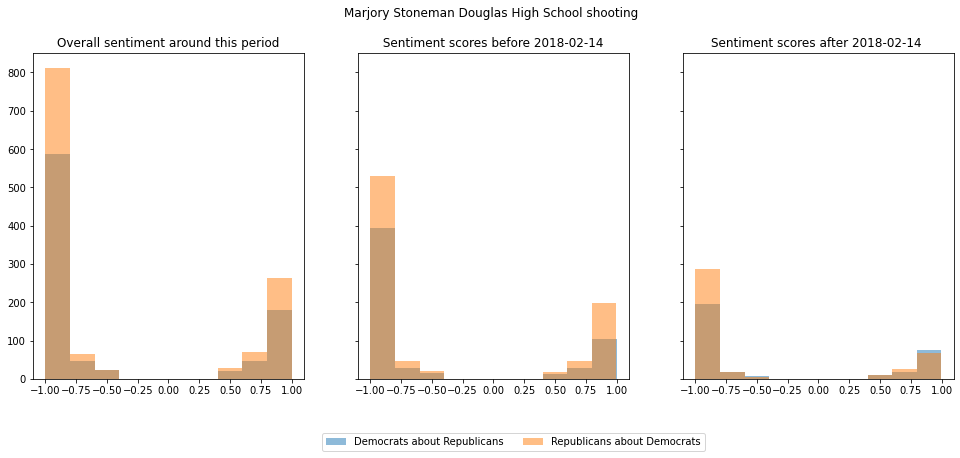

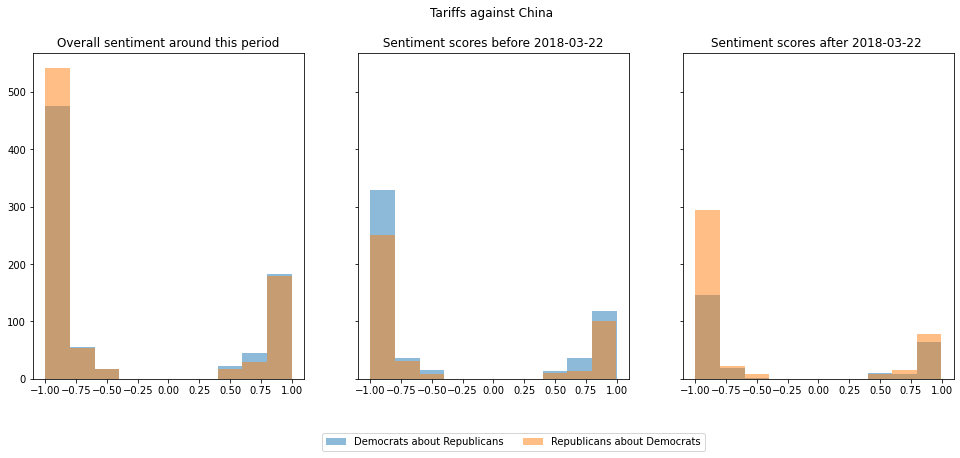

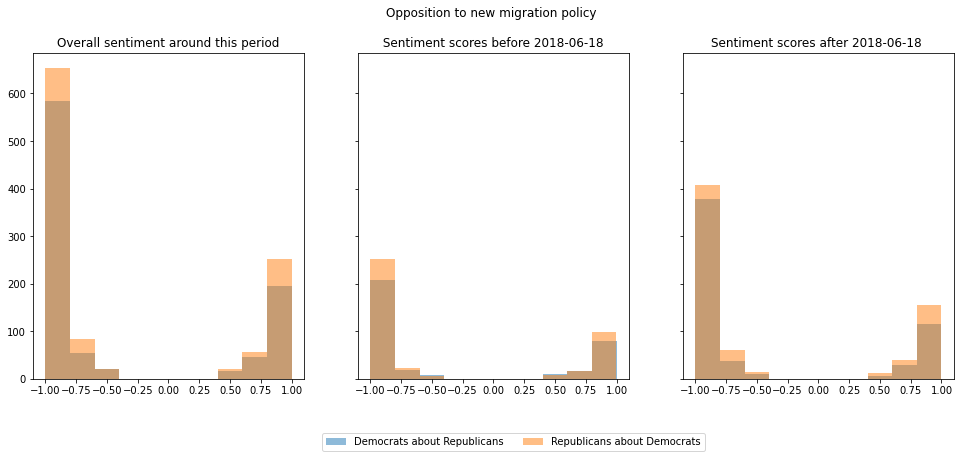

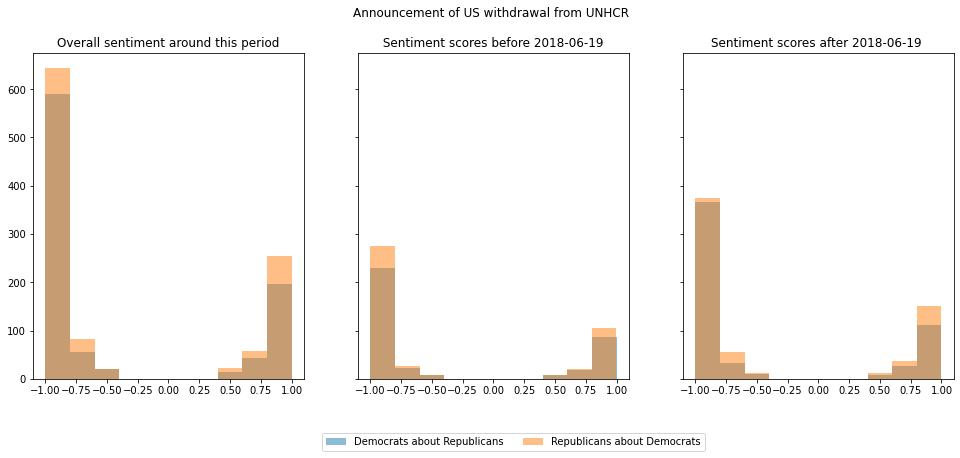

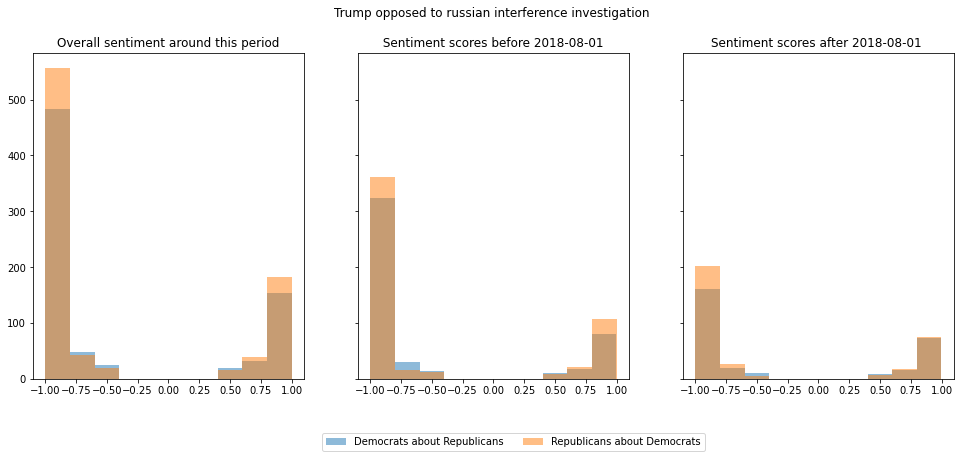

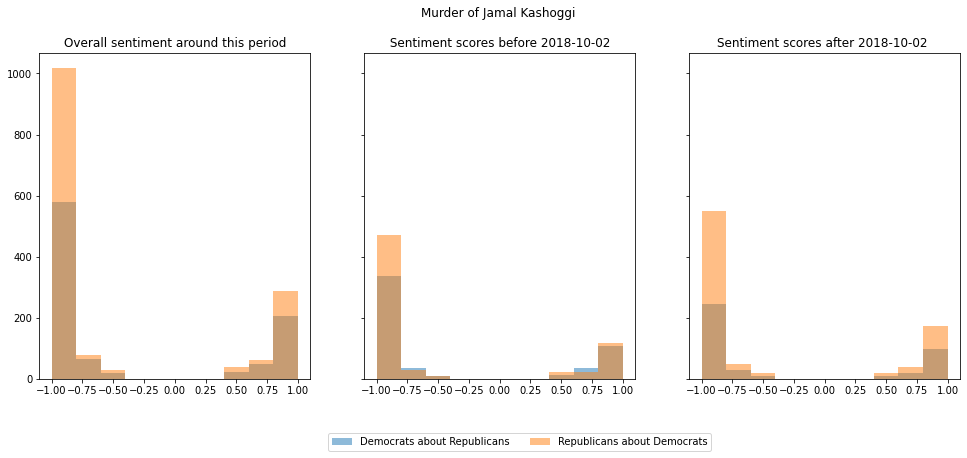

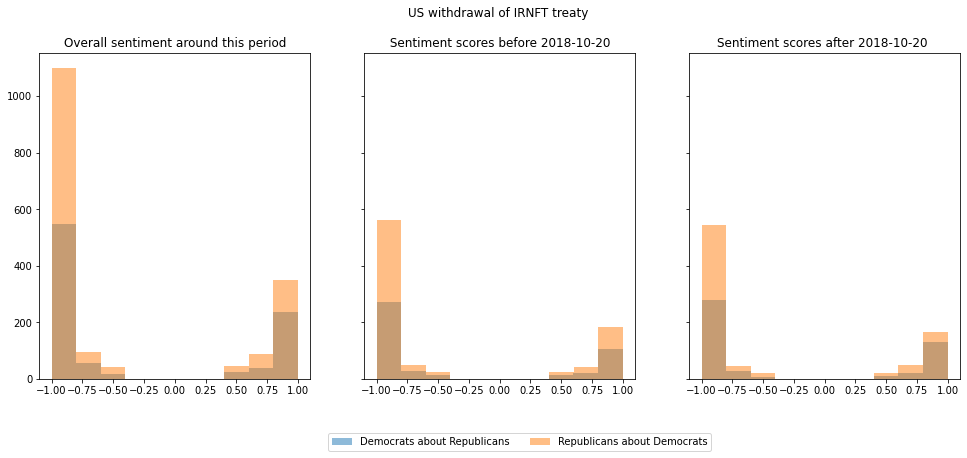

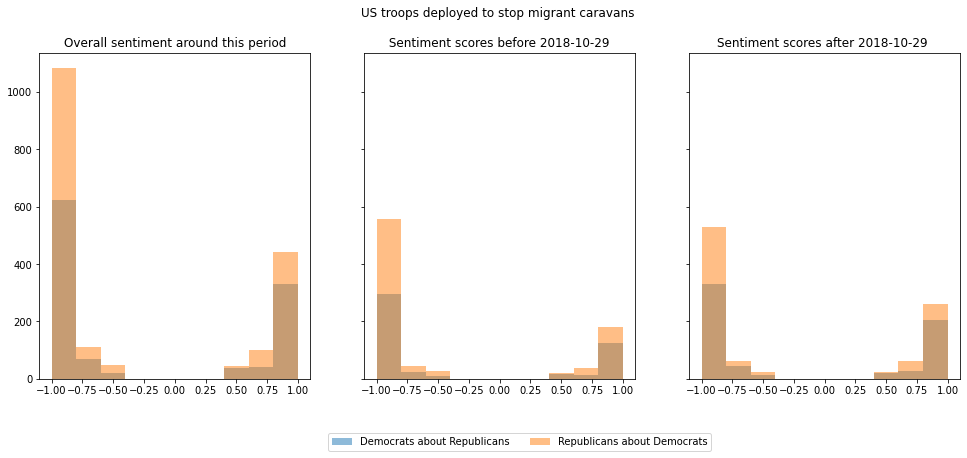

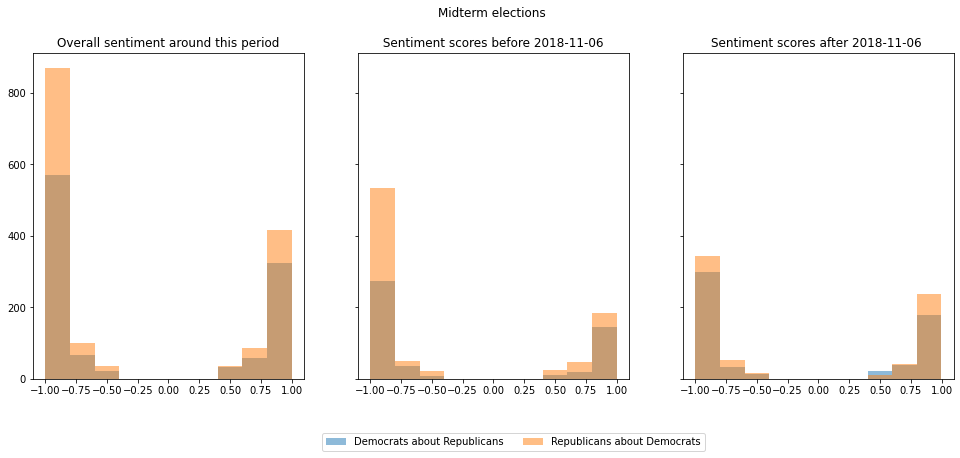

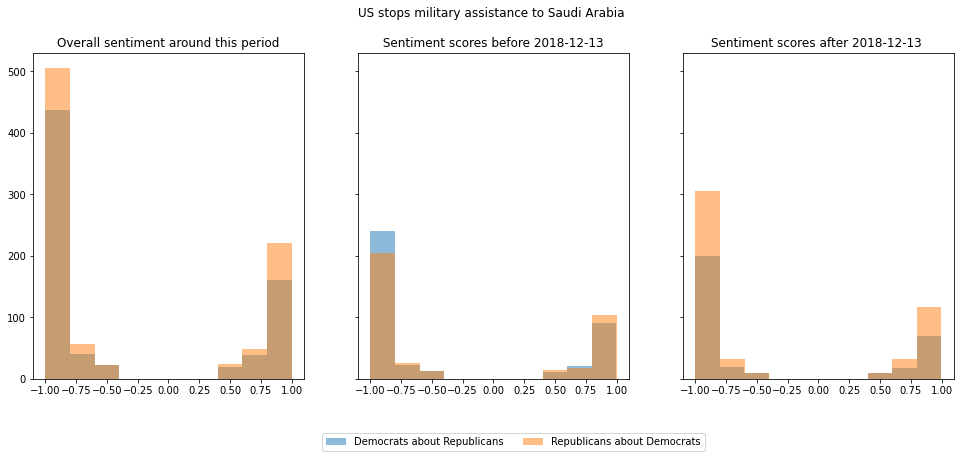

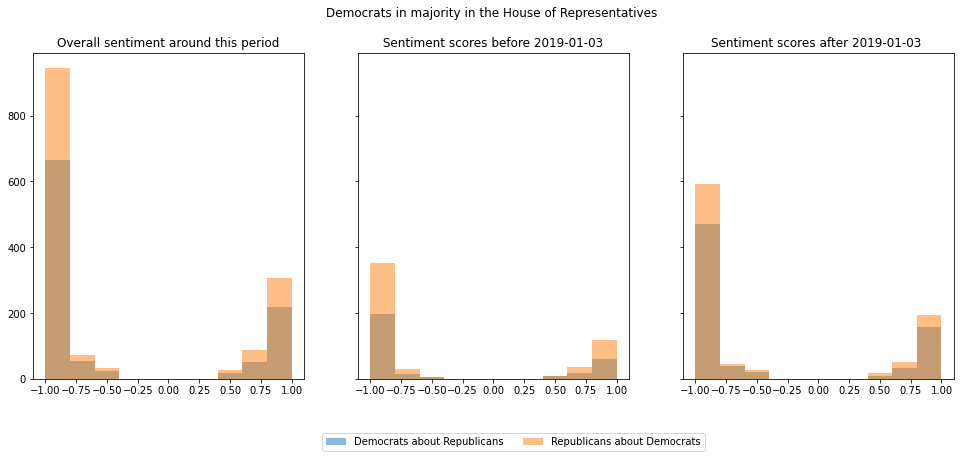

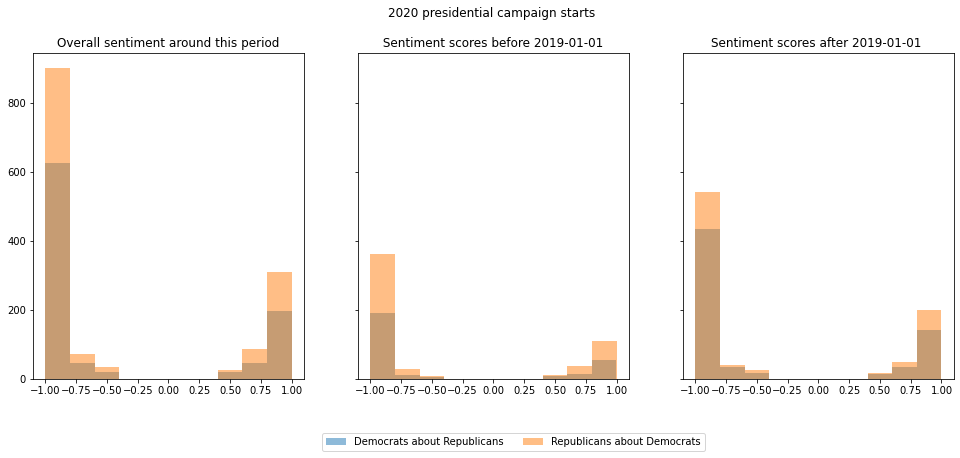

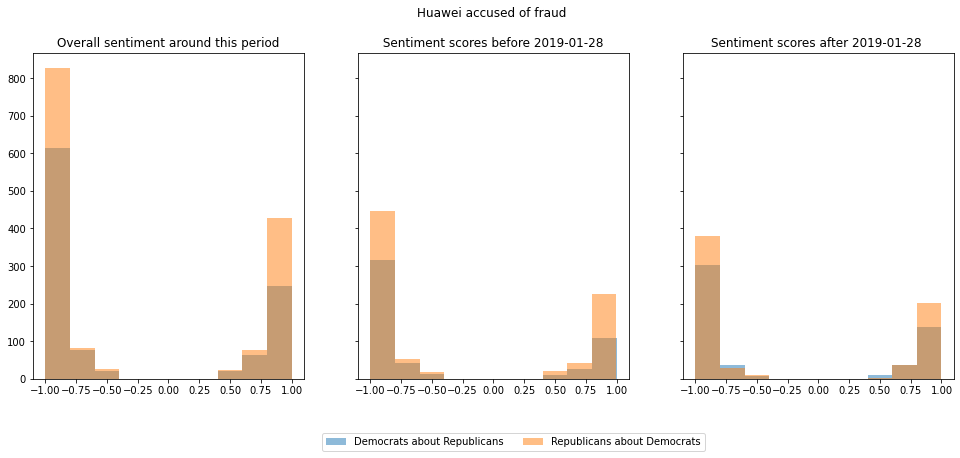

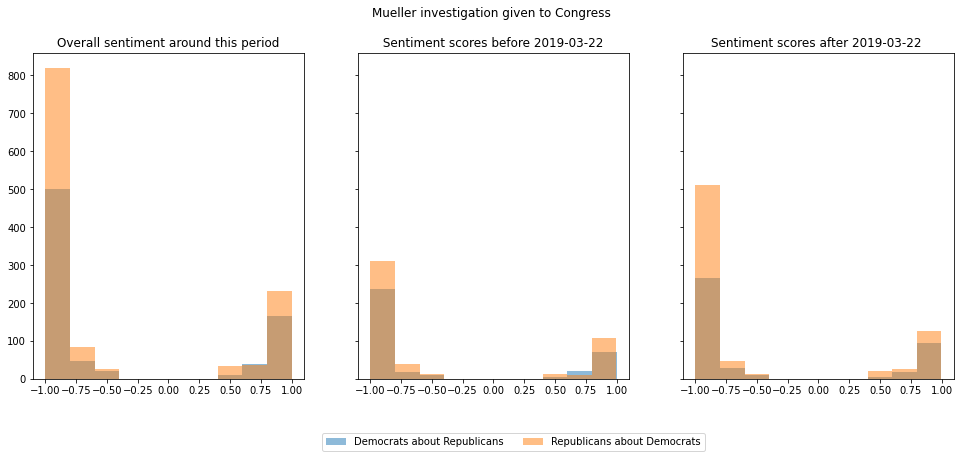

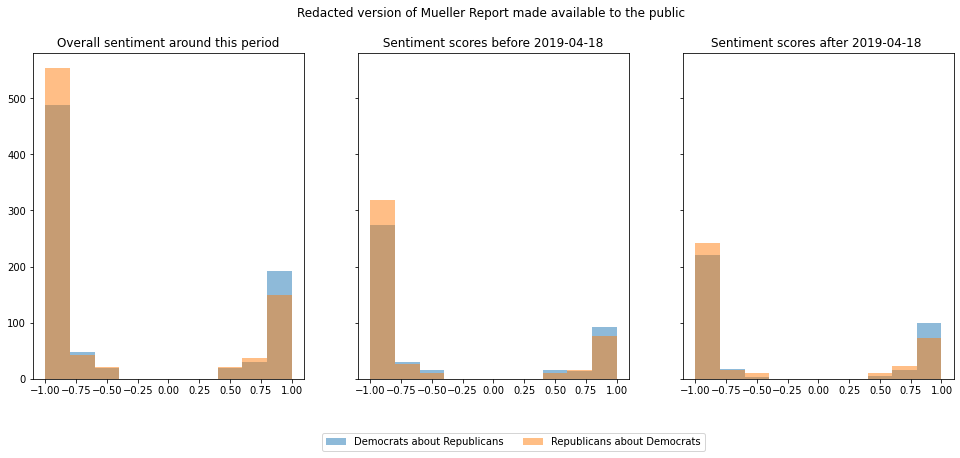

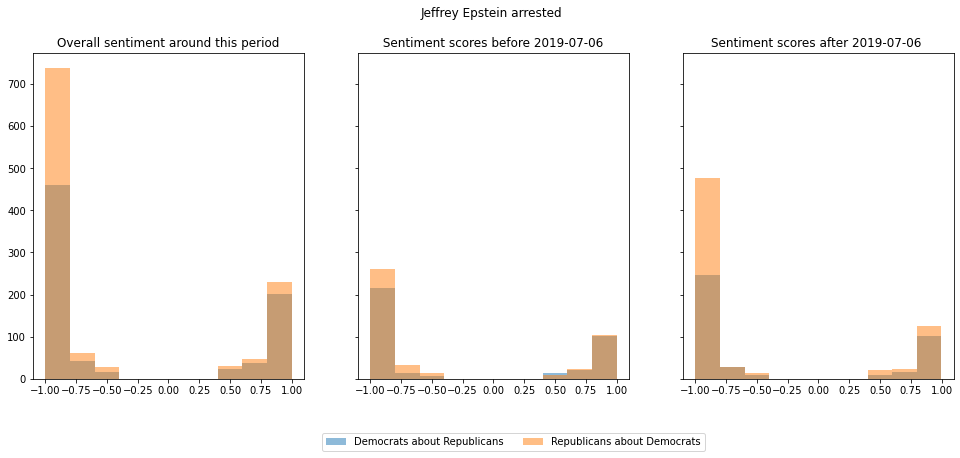

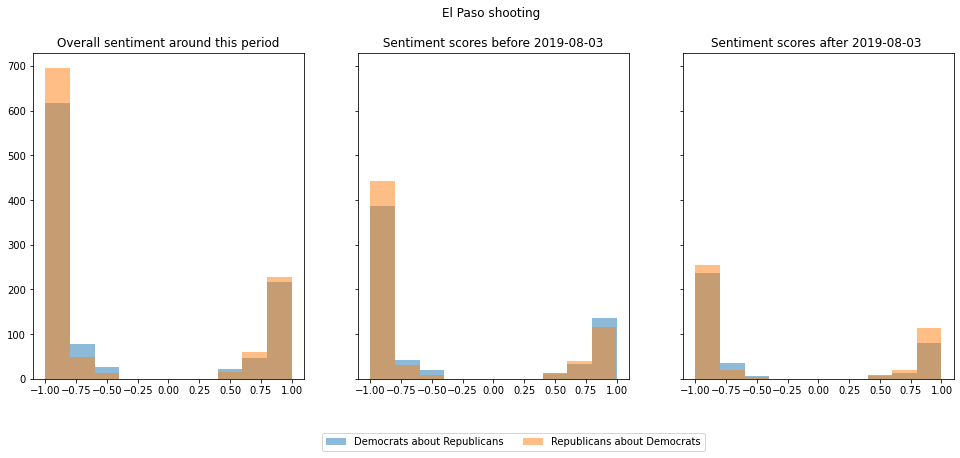

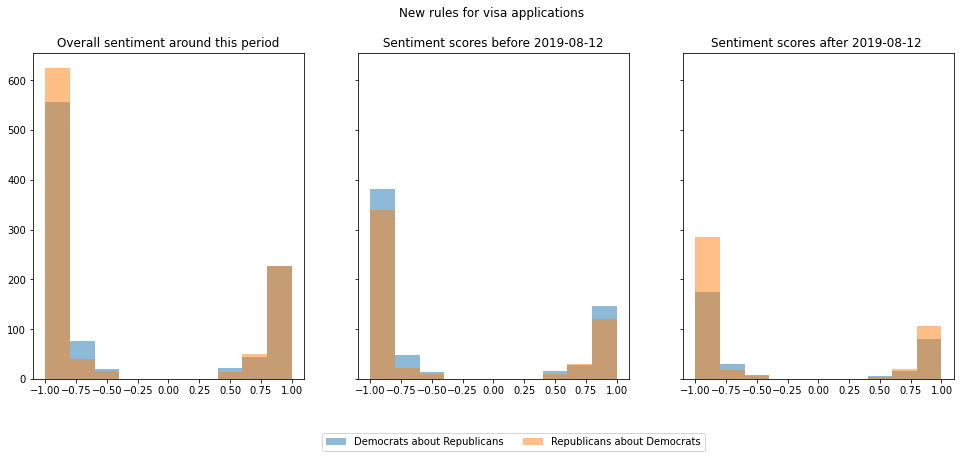

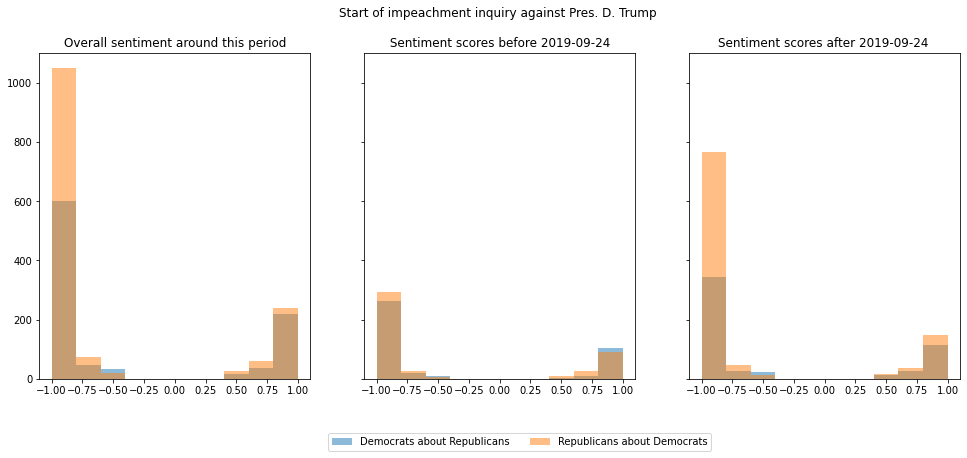

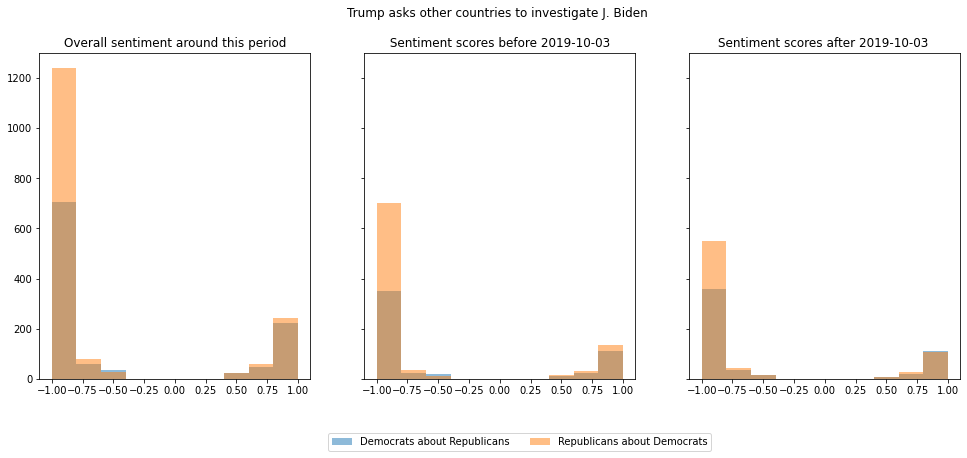

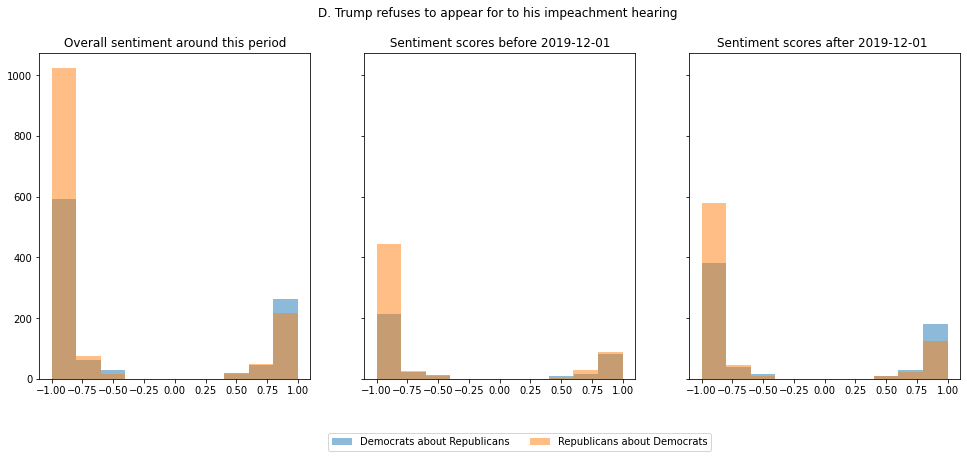

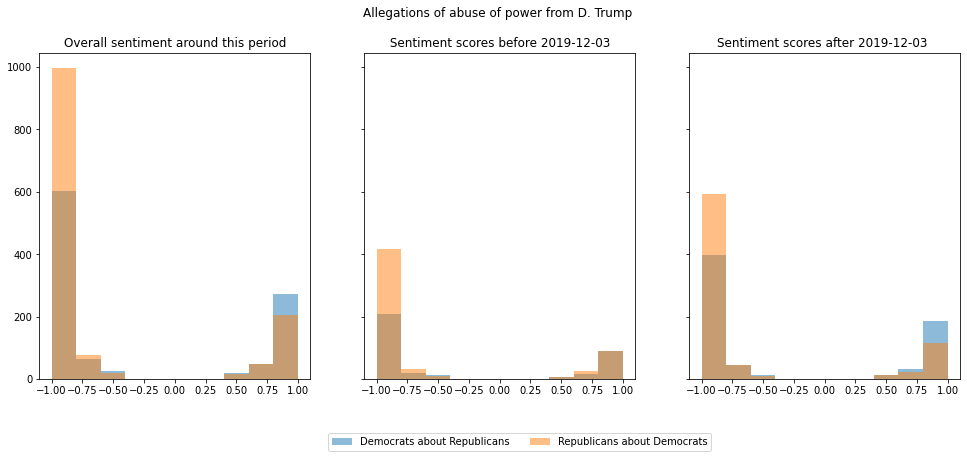

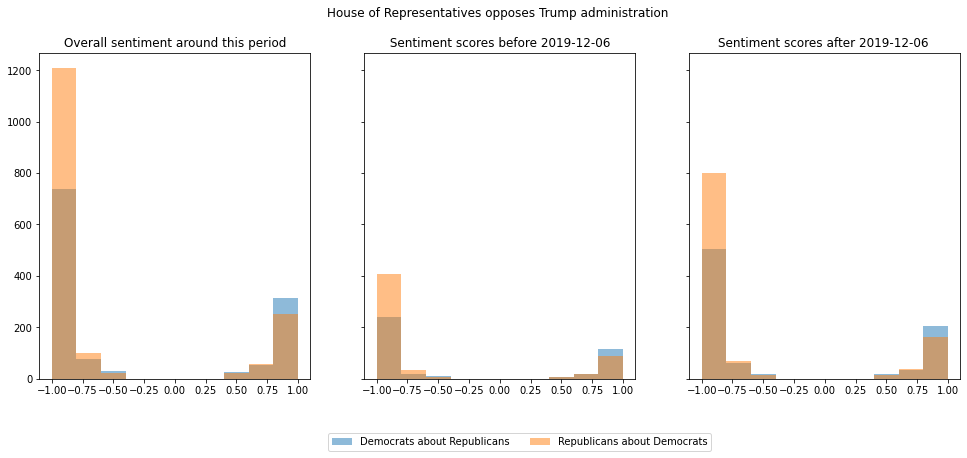

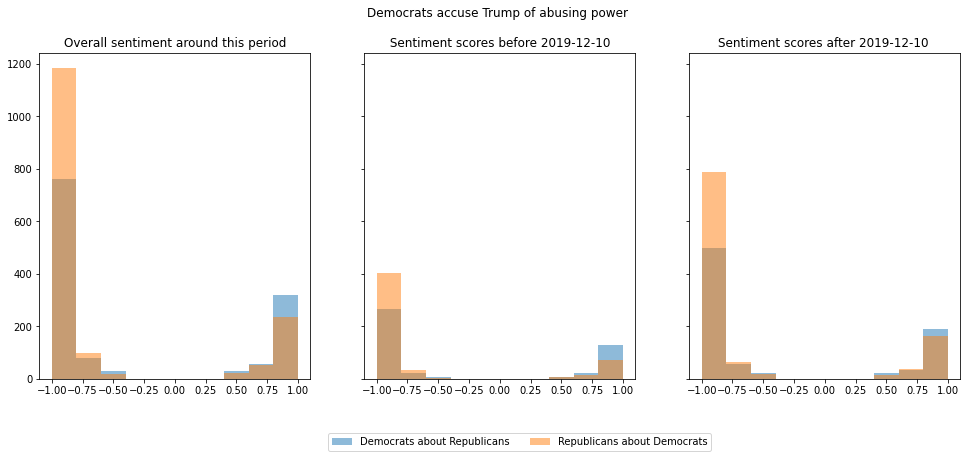

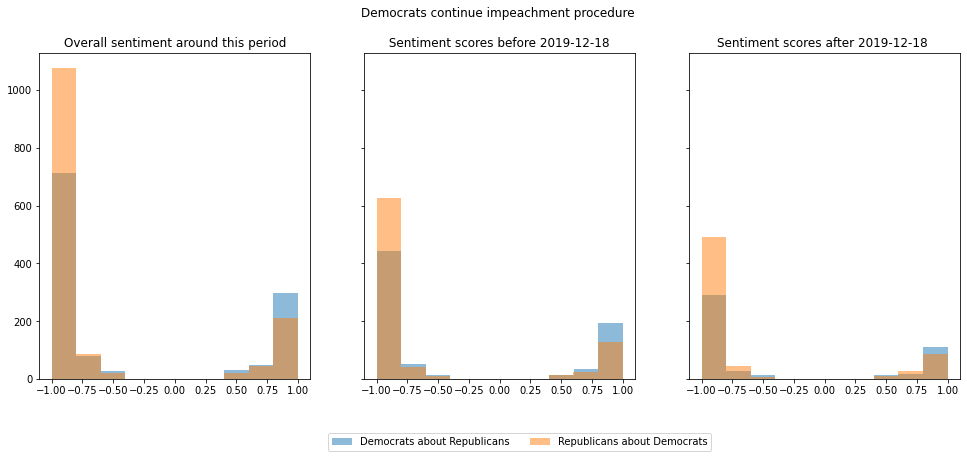

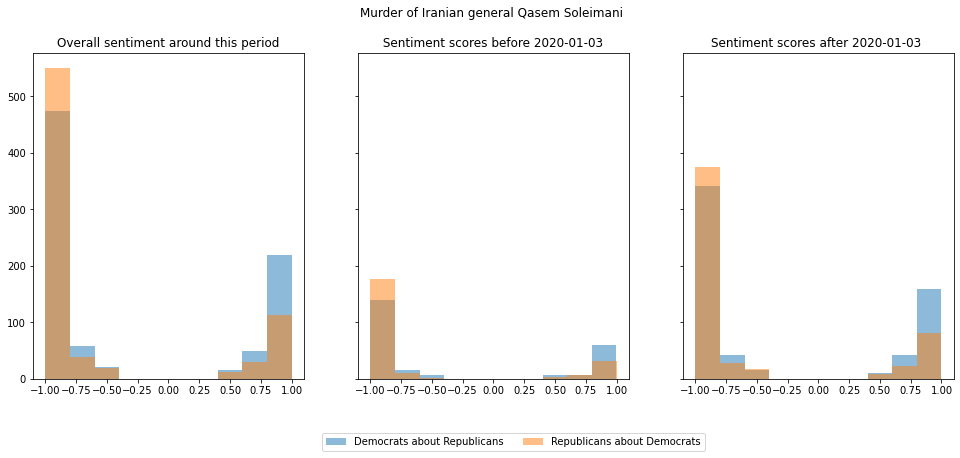

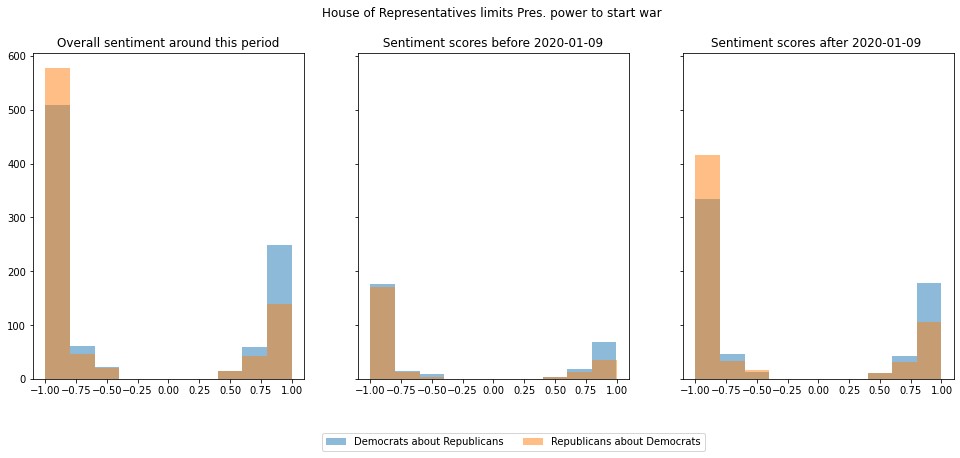

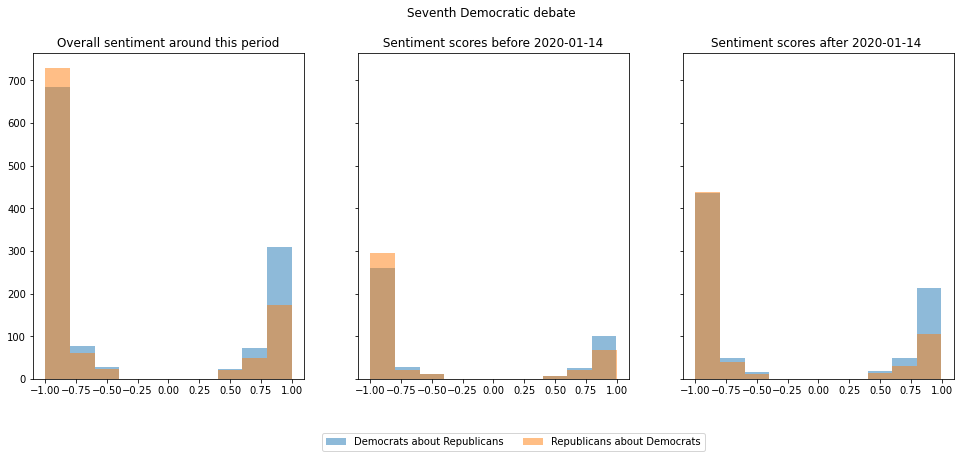

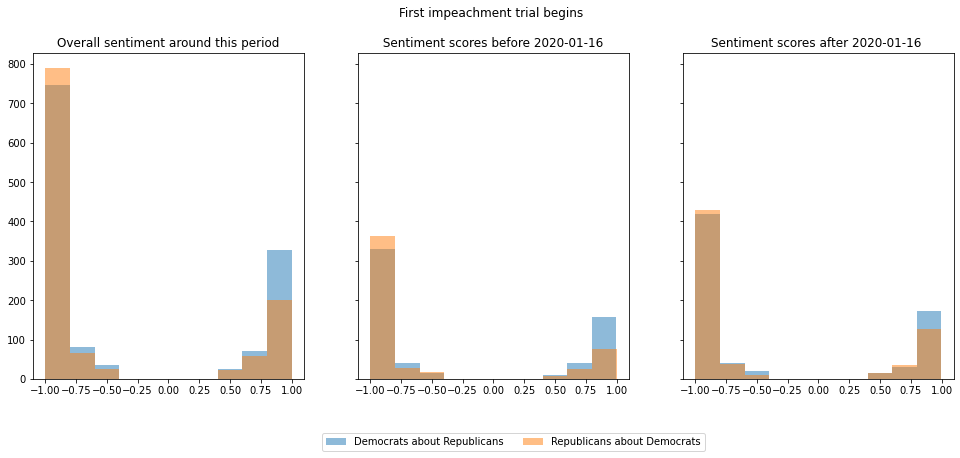

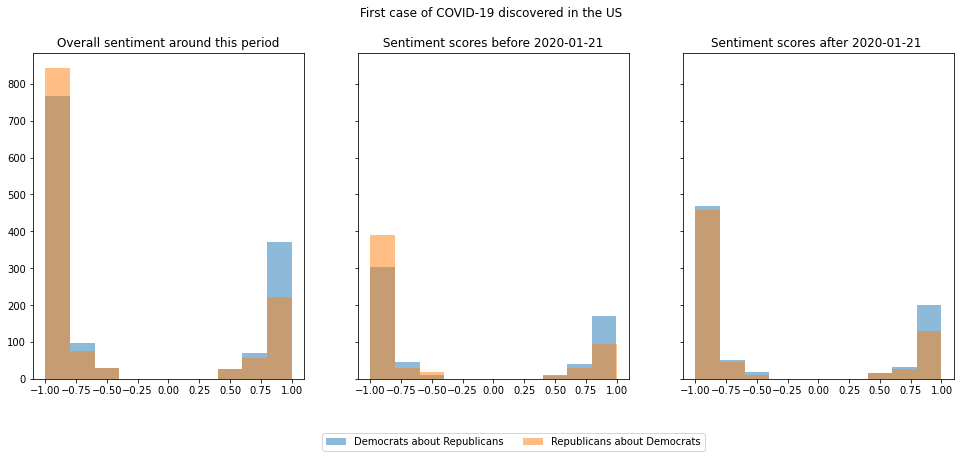

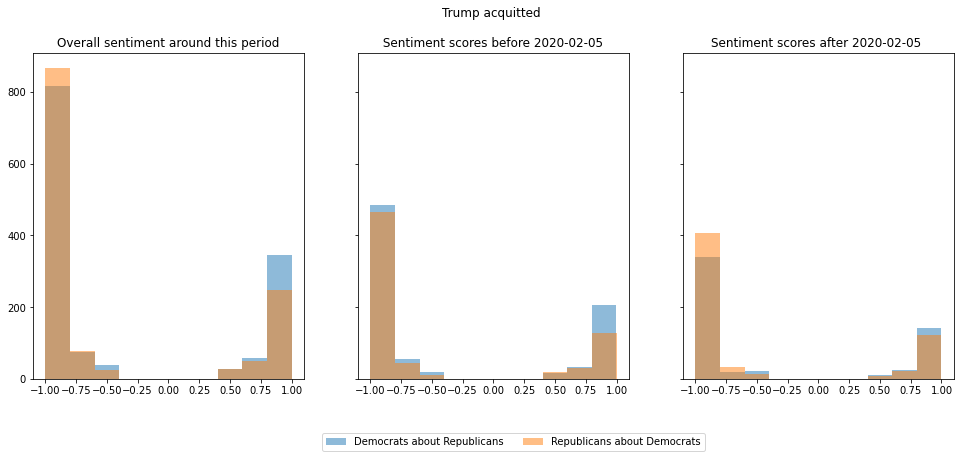

In [20]:
i = 0
for key_event in events.date:
    fig, axes = plt.subplots(1, 3, sharey=True, figsize=(16.5,6))
    axes[0].hist(df_dem[(df_dem['date'] < (key_event + timedelta(weeks=2))) & (df_dem['date'] > (key_event - timedelta(weeks=2)))]['flair_score'], alpha = 0.5, label ="Democrats about Republicans");
    axes[0].hist(df_rep[(df_rep['date'] < (key_event + timedelta(weeks=2))) & (df_rep['date'] > (key_event - timedelta(weeks=2)))]['flair_score'], alpha = 0.5, label ="Republicans about Democrats");
    axes[0].set_title('Overall sentiment around this period')
    axes[1].hist(df_dem[(df_dem['date'] > (key_event - timedelta(weeks=2))) & (df_dem['date'] <= key_event)]['flair_score'], alpha = 0.5, label ="Democrats about Republicans");
    axes[1].hist(df_rep[(df_rep['date'] > (key_event - timedelta(weeks=2))) & (df_rep['date'] <= key_event)]['flair_score'], alpha = 0.5, label ="Republicans about Democrats");
    axes[1].set_title('{} \n \n Sentiment scores before {} '.format(events[events['date'] == key_event]['short_desc'][i], key_event.date()))
    axes[2].hist(df_dem[(df_dem['date'] < (key_event + timedelta(weeks=2))) & (df_dem['date'] >= key_event)]['flair_score'], alpha = 0.5, label ="Democrats about Republicans");
    axes[2].hist(df_rep[(df_rep['date'] < (key_event + timedelta(weeks=2))) & (df_rep['date'] >= key_event)]['flair_score'], alpha = 0.5, label ="Republicans about Democrats");
    axes[2].set_title('Sentiment scores after {} '.format(key_event.date()))
    axes[0].legend(bbox_to_anchor =(2.5, -0.15), ncol = 2)
    i = i + 1

### 1 week prior and after event

In [ ]:
i = 0
for key_event in events.date:
    fig, axes = plt.subplots(1, 3, sharey=True, figsize=(16.5,6))
    axes[0].hist(df_dem[(df_dem['date'] < (key_event + timedelta(weeks=1))) & (df_dem['date'] > (key_event - timedelta(weeks=1)))]['flair_score'], alpha = 0.5, label ="Democrats about Republicans");
    axes[0].hist(df_rep[(df_rep['date'] < (key_event + timedelta(weeks=1))) & (df_rep['date'] > (key_event - timedelta(weeks=1)))]['flair_score'], alpha = 0.5, label ="Republicans about Democrats");
    axes[0].set_title('Overall sentiment around this period')
    axes[1].hist(df_dem[(df_dem['date'] > (key_event - timedelta(weeks=1))) & (df_dem['date'] <= key_event)]['flair_score'], alpha = 0.5, label ="Democrats about Republicans");
    axes[1].hist(df_rep[(df_rep['date'] > (key_event - timedelta(weeks=1))) & (df_rep['date'] <= key_event)]['flair_score'], alpha = 0.5, label ="Republicans about Democrats");
    axes[1].set_title('{} \n \n Sentiment scores before {} '.format(events[events['date'] == key_event]['short_desc'][i], key_event.date()))
    axes[2].hist(df_dem[(df_dem['date'] < (key_event + timedelta(weeks=1))) & (df_dem['date'] >= key_event)]['flair_score'], alpha = 0.5, label ="Democrats about Republicans");
    axes[2].hist(df_rep[(df_rep['date'] < (key_event + timedelta(weeks=1))) & (df_rep['date'] >= key_event)]['flair_score'], alpha = 0.5, label ="Republicans about Democrats");
    axes[2].set_title('Sentiment scores after {} '.format(key_event.date()))
    axes[0].legend(bbox_to_anchor =(2.5, -0.15), ncol = 2)
    i = i + 1

# Summary table of flair scores and number of quotes

In [ ]:
# Empty tables
cols = ['Event', 'Flair_avg', 'Flair_avg_bef', 'Flair_avg_aft', 'Diff_Flair_avg', 'Quotes_num', 'Quotes_num_bef', 'Quotes_num_aft', 'Quotes_num_evol']
sum_all = pd.DataFrame(columns=cols, index=range(len(events.date)-6))
sum_rep = pd.DataFrame(columns=cols, index=range(len(events.date)-6))
sum_dem = pd.DataFrame(columns=cols, index=range(len(events.date)-6))

In [ ]:
### USING VADER AND TEXTBLOB AS WELL
# Empty tables
cols = ['Event', 'Flair_avg', 'Flair_avg_bef', 'Flair_avg_aft', 'Diff_Flair_avg', 'TextBlob_avg_bef', 'TextBlob_avg_aft', 'Diff_TB_avg', 'Compound_avg_bef', 'Compound_avg_aft', 'Diff_comp_avg', 'Quotes_num', 'Quotes_num_bef', 'Quotes_num_aft', 'Quotes_num_evol']
sum_all = pd.DataFrame(columns=cols, index=range(len(events.date)-6))
sum_rep = pd.DataFrame(columns=cols, index=range(len(events.date)-6))
sum_dem = pd.DataFrame(columns=cols, index=range(len(events.date)-6))

In [ ]:
# Fill tables
i = 0

for key_event in events.date[0:58]:
    
    sum_all['Event'][i] = events[events['date'] == key_event]['short_desc'][i]
    sum_all['Flair_avg'][i] = df[(df['date'] <= (key_event + timedelta(weeks=1))) & (df['date'] > (key_event - timedelta(weeks=1)))]['flair_score'].mean()
    sum_all['Flair_avg_bef'][i] = df[(df['date'] >= (key_event - timedelta(weeks=1))) & (df['date'] <= key_event)]['flair_score'].mean()    
    sum_all['Flair_avg_aft'][i] = df[(df['date'] <= (key_event + timedelta(weeks=1))) & (df['date'] > key_event)]['flair_score'].mean()
    sum_all['Diff_Flair_avg'][i] = sum_all['Flair_avg_aft'][i] - sum_all['Flair_avg_bef'][i]
    sum_all['Quotes_num'][i] = len(df[(df['date'] <= (key_event + timedelta(weeks=1))) & (df['date'] >= (key_event - timedelta(weeks=1)))]['flair_score'])
    sum_all['Quotes_num_bef'][i] = len(df[(df['date'] >= (key_event - timedelta(weeks=1))) & (df['date'] <= key_event)]['flair_score'])
    sum_all['Quotes_num_aft'][i] = len(df[(df['date'] <= (key_event + timedelta(weeks=1))) & (df['date'] > key_event)]['flair_score'])
    sum_all['Quotes_num_evol'][i] = (sum_all['Quotes_num_aft'][i] - sum_all['Quotes_num_bef'][i]) / sum_all['Quotes_num_bef'][i]
    
    sum_rep['Event'][i] = events[events['date'] == key_event]['short_desc'][i]
    sum_rep['Flair_avg'][i] = df_rep[(df_rep['date'] <= (key_event + timedelta(weeks=1))) & (df_rep['date'] > (key_event - timedelta(weeks=1)))]['flair_score'].mean()
    sum_rep['Flair_avg_bef'][i] = df_rep[(df_rep['date'] >= (key_event - timedelta(weeks=1))) & (df_rep['date'] <= key_event)]['flair_score'].mean()    
    sum_rep['Flair_avg_aft'][i] = df_rep[(df_rep['date'] <= (key_event + timedelta(weeks=1))) & (df_rep['date'] > key_event)]['flair_score'].mean()
    sum_rep['Diff_Flair_avg'][i] = sum_rep['Flair_avg_aft'][i] - sum_rep['Flair_avg_bef'][i]
    sum_rep['Quotes_num'][i] = len(df_rep[(df_rep['date'] <= (key_event + timedelta(weeks=1))) & (df_rep['date'] >= (key_event - timedelta(weeks=1)))]['flair_score'])
    sum_rep['Quotes_num_bef'][i] = len(df_rep[(df_rep['date'] >= (key_event - timedelta(weeks=1))) & (df_rep['date'] <= key_event)]['flair_score'])
    sum_rep['Quotes_num_aft'][i] = len(df_rep[(df_rep['date'] <= (key_event + timedelta(weeks=1))) & (df_rep['date'] > key_event)]['flair_score'])
    sum_rep['Quotes_num_evol'][i] = (sum_rep['Quotes_num_aft'][i] - sum_rep['Quotes_num_bef'][i]) / sum_rep['Quotes_num_bef'][i]
    
    sum_dem['Event'][i] = events[events['date'] == key_event]['short_desc'][i]
    sum_dem['Flair_avg'][i] = df_dem[(df_dem['date'] <= (key_event + timedelta(weeks=1))) & (df_dem['date'] > (key_event - timedelta(weeks=1)))]['flair_score'].mean()
    sum_dem['Flair_avg_bef'][i] = df_dem[(df_dem['date'] >= (key_event - timedelta(weeks=1))) & (df_dem['date'] <= key_event)]['flair_score'].mean()    
    sum_dem['Flair_avg_aft'][i] = df_dem[(df_dem['date'] <= (key_event + timedelta(weeks=1))) & (df_dem['date'] > key_event)]['flair_score'].mean()
    sum_dem['Diff_Flair_avg'][i] = sum_dem['Flair_avg_aft'][i] - sum_dem['Flair_avg_bef'][i]
    sum_dem['Quotes_num'][i] = len(df_dem[(df_dem['date'] <= (key_event + timedelta(weeks=1))) & (df_dem['date'] >= (key_event - timedelta(weeks=1)))]['flair_score'])
    sum_dem['Quotes_num_bef'][i] = len(df_dem[(df_dem['date'] >= (key_event - timedelta(weeks=1))) & (df_dem['date'] <= key_event)]['flair_score'])
    sum_dem['Quotes_num_aft'][i] = len(df_dem[(df_dem['date'] <= (key_event + timedelta(weeks=1))) & (df_dem['date'] > key_event)]['flair_score'])
    sum_dem['Quotes_num_evol'][i] = (sum_dem['Quotes_num_aft'][i] - sum_dem['Quotes_num_bef'][i]) / sum_dem['Quotes_num_bef'][i]
       
    i += 1

In [ ]:
### USING VADER AND TEXTBLOB AS WELL
# Fill tables
i = 0

for key_event in events.date[0:58]:
    
    sum_all['Event'][i] = events[events['date'] == key_event]['short_desc'][i]
    sum_all['Flair_avg'][i] = df[(df['date'] <= (key_event + timedelta(weeks=1))) & (df['date'] > (key_event - timedelta(weeks=1)))]['flair_score'].mean()
    
    sum_all['Flair_avg_bef'][i] = df[(df['date'] >= (key_event - timedelta(weeks=1))) & (df['date'] <= key_event)]['flair_score'].mean()    
    sum_all['Flair_avg_aft'][i] = df[(df['date'] <= (key_event + timedelta(weeks=1))) & (df['date'] > key_event)]['flair_score'].mean()
    sum_all['Diff_Flair_avg'][i] = sum_all['Flair_avg_aft'][i] - sum_all['Flair_avg_bef'][i]
    sum_all['TextBlob_avg_bef'][i] = df[(df['date'] >= (key_event - timedelta(weeks=1))) & (df['date'] <= key_event)]['textblob_score'].mean()    
    sum_all['TextBlob_avg_aft'][i] = df[(df['date'] <= (key_event + timedelta(weeks=1))) & (df['date'] > key_event)]['textblob_score'].mean()
    sum_all['Diff_TB_avg'][i] = sum_all['TextBlob_avg_aft'][i] - sum_all['TextBlob_avg_bef'][i]
    sum_all['Compound_avg_bef'][i] = df[(df['date'] >= (key_event - timedelta(weeks=1))) & (df['date'] <= key_event)]['compound'].mean()    
    sum_all['Compound_avg_aft'][i] = df[(df['date'] <= (key_event + timedelta(weeks=1))) & (df['date'] > key_event)]['compound'].mean()
    sum_all['Diff_comp_avg'][i] = sum_all['Compound_avg_aft'][i] - sum_all['Compound_avg_bef'][i]
    
    sum_all['Quotes_num'][i] = len(df[(df['date'] <= (key_event + timedelta(weeks=1))) & (df['date'] >= (key_event - timedelta(weeks=1)))]['flair_score'])
    sum_all['Quotes_num_bef'][i] = len(df[(df['date'] >= (key_event - timedelta(weeks=1))) & (df['date'] <= key_event)]['flair_score'])
    sum_all['Quotes_num_aft'][i] = len(df[(df['date'] <= (key_event + timedelta(weeks=1))) & (df['date'] > key_event)]['flair_score'])
    sum_all['Quotes_num_evol'][i] = (sum_all['Quotes_num_aft'][i] - sum_all['Quotes_num_bef'][i]) / sum_all['Quotes_num_bef'][i]
    
    
    
    sum_rep['Event'][i] = events[events['date'] == key_event]['short_desc'][i]
    sum_rep['Flair_avg'][i] = df_rep[(df_rep['date'] <= (key_event + timedelta(weeks=1))) & (df_rep['date'] > (key_event - timedelta(weeks=1)))]['flair_score'].mean()
    
    sum_rep['Flair_avg_bef'][i] = df_rep[(df_rep['date'] >= (key_event - timedelta(weeks=1))) & (df_rep['date'] <= key_event)]['flair_score'].mean()    
    sum_rep['Flair_avg_aft'][i] = df_rep[(df_rep['date'] <= (key_event + timedelta(weeks=1))) & (df_rep['date'] > key_event)]['flair_score'].mean()
    sum_rep['Diff_Flair_avg'][i] = sum_rep['Flair_avg_aft'][i] - sum_rep['Flair_avg_bef'][i]
    sum_rep['TextBlob_avg_bef'][i] = df_rep[(df_rep['date'] >= (key_event - timedelta(weeks=1))) & (df_rep['date'] <= key_event)]['textblob_score'].mean()    
    sum_rep['TextBlob_avg_aft'][i] = df_rep[(df_rep['date'] <= (key_event + timedelta(weeks=1))) & (df_rep['date'] > key_event)]['textblob_score'].mean()
    sum_rep['Diff_TB_avg'][i] = sum_rep['TextBlob_avg_aft'][i] - sum_rep['TextBlob_avg_bef'][i]
    sum_rep['Compound_avg_bef'][i] = df_rep[(df_rep['date'] >= (key_event - timedelta(weeks=1))) & (df_rep['date'] <= key_event)]['compound'].mean()    
    sum_rep['Compound_avg_aft'][i] = df_rep[(df_rep['date'] <= (key_event + timedelta(weeks=1))) & (df_rep['date'] > key_event)]['compound'].mean()
    sum_rep['Diff_comp_avg'][i] = sum_rep['Compound_avg_aft'][i] - sum_rep['Compound_avg_bef'][i]
    
    sum_rep['Quotes_num'][i] = len(df_rep[(df_rep['date'] <= (key_event + timedelta(weeks=1))) & (df_rep['date'] >= (key_event - timedelta(weeks=1)))]['flair_score'])
    sum_rep['Quotes_num_bef'][i] = len(df_rep[(df_rep['date'] >= (key_event - timedelta(weeks=1))) & (df_rep['date'] <= key_event)]['flair_score'])
    sum_rep['Quotes_num_aft'][i] = len(df_rep[(df_rep['date'] <= (key_event + timedelta(weeks=1))) & (df_rep['date'] > key_event)]['flair_score'])
    sum_rep['Quotes_num_evol'][i] = (sum_rep['Quotes_num_aft'][i] - sum_rep['Quotes_num_bef'][i]) / sum_rep['Quotes_num_bef'][i]
    
    
    
    sum_dem['Event'][i] = events[events['date'] == key_event]['short_desc'][i]
    sum_dem['Flair_avg'][i] = df_dem[(df_dem['date'] <= (key_event + timedelta(weeks=1))) & (df_dem['date'] > (key_event - timedelta(weeks=1)))]['flair_score'].mean()
    
    sum_dem['Flair_avg_bef'][i] = df_dem[(df_dem['date'] >= (key_event - timedelta(weeks=1))) & (df_dem['date'] <= key_event)]['flair_score'].mean()    
    sum_dem['Flair_avg_aft'][i] = df_dem[(df_dem['date'] <= (key_event + timedelta(weeks=1))) & (df_dem['date'] > key_event)]['flair_score'].mean()
    sum_dem['Diff_Flair_avg'][i] = sum_dem['Flair_avg_aft'][i] - sum_dem['Flair_avg_bef'][i]
    sum_dem['TextBlob_avg_bef'][i] = df_dem[(df_dem['date'] >= (key_event - timedelta(weeks=1))) & (df_dem['date'] <= key_event)]['textblob_score'].mean()    
    sum_dem['TextBlob_avg_aft'][i] = df_dem[(df_dem['date'] <= (key_event + timedelta(weeks=1))) & (df_dem['date'] > key_event)]['textblob_score'].mean()
    sum_dem['Diff_TB_avg'][i] = sum_dem['TextBlob_avg_aft'][i] - sum_dem['TextBlob_avg_bef'][i]
    sum_dem['Compound_avg_bef'][i] = df_dem[(df_dem['date'] >= (key_event - timedelta(weeks=1))) & (df_dem['date'] <= key_event)]['compound'].mean()    
    sum_dem['Compound_avg_aft'][i] = df_dem[(df_dem['date'] <= (key_event + timedelta(weeks=1))) & (df_dem['date'] > key_event)]['compound'].mean()
    sum_dem['Diff_comp_avg'][i] = sum_dem['Compound_avg_aft'][i] - sum_dem['Compound_avg_bef'][i]   
    
    sum_dem['Quotes_num'][i] = len(df_dem[(df_dem['date'] <= (key_event + timedelta(weeks=1))) & (df_dem['date'] >= (key_event - timedelta(weeks=1)))]['flair_score'])
    sum_dem['Quotes_num_bef'][i] = len(df_dem[(df_dem['date'] >= (key_event - timedelta(weeks=1))) & (df_dem['date'] <= key_event)]['flair_score'])
    sum_dem['Quotes_num_aft'][i] = len(df_dem[(df_dem['date'] <= (key_event + timedelta(weeks=1))) & (df_dem['date'] > key_event)]['flair_score'])
    sum_dem['Quotes_num_evol'][i] = (sum_dem['Quotes_num_aft'][i] - sum_dem['Quotes_num_bef'][i]) / sum_dem['Quotes_num_bef'][i]
       
    i += 1

### Tables

In [ ]:
sum_all.head(2)

In [ ]:
sum_dem.head(2)

In [ ]:
sum_rep.head(2)

### Table summary

In [ ]:
sum_all.iloc[:,1:9].astype(float).describe()

In [ ]:
sum_rep.iloc[:,1:9].astype(float).describe()

In [ ]:
sum_dem.iloc[:,1:9].astype(float).describe()

### Summary graphs

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(16.5,6))
axes[0].plot(sum_all.iloc[:,1], label=('Average Score'))
axes[0].plot(sum_all.iloc[:,2], label=('Score the week before'))
axes[0].plot(sum_all.iloc[:,3], label=('Score the week after'))
axes[0].legend()
axes[1].plot(sum_all.iloc[:,4], label=('Difference in scores btw the 2 periods'))
axes[1].legend(loc='center', bbox_to_anchor=(0.5,1.07))
axes[1].axhline(y=0.15, xmin=0.05, xmax=0.95, color='r', linestyle='-.', linewidth=1)
axes[1].axhline(y=-0.15, xmin=0.05, xmax=0.95, color='r', linestyle='-.', linewidth=1)
axes[2].plot(sum_all.iloc[:,5], label=('Total number of quotes'))
axes[2].plot(sum_all.iloc[:,6], label=('Quotes before'))
axes[2].plot(sum_all.iloc[:,7], label=('Quotes after'))
axes[2].legend(loc='lower right', bbox_to_anchor=(0.95,0.9), bbox_transform=fig.transFigure, ncol=3)
axes[3].plot(sum_all.iloc[:,8], label=('Amount evolution'))
axes[3].legend()

#### Removing the unique very large value in 4th graph :

In [ ]:
sum_all[sum_all['Quotes_num_evol'] == sum_all['Quotes_num_evol'].max()]

In [ ]:
sum_all2 = sum_all.drop(index=9)
sum_dem2 = sum_dem.drop(index=9)
sum_rep2 = sum_rep.drop(index=9)

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(16.5,6))
axes[0].plot(sum_all2.iloc[:,1], label=('Average Score'))
axes[0].plot(sum_all2.iloc[:,2], label=('Score the week before'))
axes[0].plot(sum_all2.iloc[:,3], label=('Score the week after'))
axes[0].legend()
axes[1].plot(sum_all2.iloc[:,4], label=('Difference in scores btw the 2 periods'))
axes[1].legend(loc='center', bbox_to_anchor=(0.5,1.07))
axes[1].axhline(y=0.1, xmin=0.05, xmax=0.95, color='r', linestyle='-.', linewidth=1)
axes[1].axhline(y=-0.1, xmin=0.05, xmax=0.95, color='r', linestyle='-.', linewidth=1)
axes[2].plot(sum_all2.iloc[:,5], label=('Total number of quotes'))
axes[2].plot(sum_all2.iloc[:,6], label=('Quotes before'))
axes[2].plot(sum_all2.iloc[:,7], label=('Quotes after'))
axes[2].legend(loc='lower right', bbox_to_anchor=(0.95,0.9), bbox_transform=fig.transFigure, ncol=3)
axes[3].plot(sum_all2.iloc[:,8], label=('Amount evolution'))
axes[3].legend()

In [ ]:
# Difference in scores zoomed in
fig, axes = plt.subplots(figsize=(16.5,6))
axes.plot(sum_dem.iloc[:,4], label=('Democrats'))
axes.plot(sum_rep.iloc[:,4], label=('Republicans'))
axes.axhline(y=0, color='r', linestyle='-.', linewidth=1)
axes.legend()
axes.set_title('Difference in scores between the 2 periods');

In [ ]:
# Difference between each party for the difference in score
fig, axes = plt.subplots(figsize=(16.5,6))
axes.plot(sum_dem.iloc[:,4] - sum_rep.iloc[:,4], label = 'Democrats - Republicans')
axes.axhline(y=0, color='r', linestyle='-.', linewidth=1)
axes.legend()
axes.set_title('Difference in difference scores between the 2 parties');

### Comparing this difference in difference with the 2 other sentiment scores

In [ ]:
# Difference between each party for the difference in score
fig, axes = plt.subplots(figsize=(16.5,6))
axes.plot(sum_dem.iloc[:,4] - sum_rep.iloc[:,4], label = 'Flair')
axes.plot(sum_dem.iloc[:,7] - sum_rep.iloc[:,7], label = 'TextBlob')
axes.plot(sum_dem.iloc[:,10] - sum_rep.iloc[:,10], label = 'Vader')
axes.axhline(y=0, color='r', linestyle='-.', linewidth=1)
axes.legend()
axes.set_title('Difference in difference scores between the 2 parties');

### Pearson correlation

In [ ]:
flair = (sum_dem.iloc[:,4] - sum_rep.iloc[:,4]).astype('float64')
textblob = (sum_dem.iloc[:,7] - sum_rep.iloc[:,7]).astype('float64')
vader = (sum_dem.iloc[:,10] - sum_rep.iloc[:,10]).astype('float64')

In [ ]:
print(vader.corr(textblob, method='pearson'))
print(vader.corr(flair, method='pearson'))
print(textblob.corr(flair, method='pearson'))

# Most extreme values inspection
## Difference in score (average after - average before)
### Overall

In [ ]:
sum_all[(sum_all.iloc[:,4] >= sum_all.iloc[:,4].quantile(0.9)) | (sum_all.iloc[:,4] <= sum_all.iloc[:,4].quantile(0.1))]

### Democrats

In [ ]:
sum_dem[(sum_dem.iloc[:,4] >= sum_dem.iloc[:,4].quantile(0.9)) | (sum_dem.iloc[:,4] <= sum_dem.iloc[:,4].quantile(0.1))]

### Republicans

In [ ]:
sum_rep[(sum_rep.iloc[:,4] >= sum_rep.iloc[:,4].quantile(0.9)) | (sum_rep.iloc[:,4] <= sum_rep.iloc[:,4].quantile(0.1))]

## Number of quotes
### Overall

In [ ]:
sum_all[(sum_all.iloc[:,8] >= sum_all.iloc[:,8].quantile(0.9)) | (sum_all.iloc[:,8] <= sum_all.iloc[:,8].quantile(0.1))]

### Democrats

In [ ]:
sum_dem[(sum_dem.iloc[:,8] >= sum_dem.iloc[:,8].quantile(0.9)) | (sum_dem.iloc[:,8] <= sum_dem.iloc[:,8].quantile(0.1))]

### Republicans

In [ ]:
sum_rep[(sum_rep.iloc[:,8] >= sum_rep.iloc[:,8].quantile(0.9)) | (sum_rep.iloc[:,8] <= sum_rep.iloc[:,8].quantile(0.1))]

In [ ]:
print('Overall : \n',sum_all[(sum_all.iloc[:,8] >= sum_all.iloc[:,8].quantile(0.9)) | (sum_all.iloc[:,8] <= sum_all.iloc[:,8].quantile(0.1))]['Event'],
     '\n \n Democrats : \n', sum_dem[(sum_dem.iloc[:,8] >= sum_dem.iloc[:,8].quantile(0.9)) | (sum_dem.iloc[:,8] <= sum_dem.iloc[:,8].quantile(0.1))]['Event'],
     '\n \n Republicans : \n', sum_rep[(sum_rep.iloc[:,8] >= sum_rep.iloc[:,8].quantile(0.9)) | (sum_rep.iloc[:,8] <= sum_rep.iloc[:,8].quantile(0.1))]['Event'])


## Most controversial events (Increase in number of quotes the week after)
### Overall

In [ ]:
sum_all[(sum_all.iloc[:,8] >= sum_all.iloc[:,8].quantile(0.9))]

### Democrats

In [ ]:
sum_dem[(sum_dem.iloc[:,8] >= sum_dem.iloc[:,8].quantile(0.9))]

### Republicans

In [ ]:
sum_rep[(sum_rep.iloc[:,8] >= sum_rep.iloc[:,8].quantile(0.9))]

## Silencing events (less quotes the week after)
### Overall

In [ ]:
sum_all[(sum_all.iloc[:,8] <= sum_all.iloc[:,8].quantile(0.1))]

### Democrats

In [ ]:
sum_dem[(sum_dem.iloc[:,8] <= sum_dem.iloc[:,8].quantile(0.1))]

### Republicans 

In [ ]:
sum_rep[(sum_rep.iloc[:,8] <= sum_rep.iloc[:,8].quantile(0.1))]